![Wolfe](https://s3.amazonaws.com/lquant-images/wolfe_luo.jpg)

# <u>Luo's QES - Python Microservices API

# Table of Contents<a name="TOC"></a> 

1. [Introduction](#intro)
    1. [Prerequisites](#prereq)
    1. [Scenario](#scenario)
    1. [Authentication and Connection](#auth_conn)
1. [The Catalog](#catalog)
    1. [Universes](#univ)
    1. [Factors](#factor)
    1. [Meta Data](#meta_data)
    1. [Portfolios](#port)
    1. [Templates](#temp)
1. [Job Requests](#job_reqs)
    1. [Job Request Content](#req_cont)
    1. [Job Info](#job_info)
    1. [Job Logs](#job_logs)
    1. [Searching for a Job](#find_job)
1. [Building a Custom Risk Model](#riskmodel)
    1. [RiskModel Class Parameters](#rm_params)
    1. [Getting Risk Model Data](#rm_data)
        1. [Factor Covariance Matric](#.cov)
        1. [Security Exposures](#.exp)
        1. [Factor Mimicking Portfolio](#.fmp)
        1. [Security Master](#.idm)
        1. [Factor Info file](#.info)
        1. [Security Meta](#.meta)
        1. [Security Specific Risk](#.rsk)
        1. [Factor Returns](#.rtn)
    1. [Using a Custom Risk Model in other Classes](#using_rm)
1. [Portfolio Attribution](#attr)
    1. [Attribution Class Parameters](#attc)
    1. [Attribution Results](#attr_res)
        1. [Attribution Summary](#att_summ)
        1. [Correlations](#corr)
        1. [Factor Exposures](#fact_exp)
        1. [Factor Returns](#fact_rets)
        1. [Other Atrribution Result Options](#other_att)
1. [Portfolio Hedge](#hdg)
    1. [Hedge Class](#hdg_class)
        1. [Risk Model](#hdg_rm)
        1. [Hedge Type](#hdg_htype)
        1. [Factor to Hedge](#hdg_fth)
        1. [Factor to Neutralize](#hdg_ftn)
        1. [Auto-Neutralization](#hdg_atn)
        1. [Maximum Neutral Exposure](#hdg_mne)
        1. [Maximum Gross Exposure](#hdg_mge)
        1. [Maximum ADV Usage](#hdg_adv)
        1. [Exclusions](#hdg_excl)
        1. [Hedge Universe](#hdg_univ)
        1. [Default Hedge Universe](#hdg_duniv)
        1. [Scalar](#hdg_sc)
        1. [Hedge Ratio Methodology](#hdg_hrm)
        1. [Additional Factor Constraint](#hdg_afc)
    1. [Hedge Output Class](#hdg_output)
1. [Portfolio Optimization](#opt)
    1. [Optimizer Class Parameters](#optc)
        1. [Objective](#objec)
        1. [Constraints](#const)
        1. [Other Optimizer Parameters](#opt_params)
    1. [Optimization Results](#opt_res)
        1. [Ex-ante Alpha](#exalpha)
        1. [Ex-ante Risk](#exrisk)
        1. [Portfolio Turnover](#port_turn)
        1. [Other Optimizer Restult Options](#opt_options)
    1. [Creating the Optimized Portfolio](#opt_port)
    1. [Post-Optimization Attribution](#opt_attr)
1. [Portfolio Simulation](#sim)
    1. [PortfolioSimulator Class Parameters](#sim_class)
        1. [Capital](#capital)
        1. [Max Volume Participation](#maxvol)
        1. [Transaction Cost Function](#costfn)
        1. [Other Simulation Parameters](#sim_params)
    1. [Portfolio Simulation Results](#sim_res)
        1. [Net Values](#net_vals)
        1. [Returns](#sim_rets)
        1. [Other Simulation Result Options](#other_sim)
        1. [Plotting Simulation Results](#plot_sim)

#### <span style="color:red">NOTE: At the end of each chapter, and throughout the notebook, there are links to return to the table of contents, like the one below:

### [To Table of Contents](#TOC)

# Introduction  <a name="intro"></a>

## <u> Prerequisites<a name="prereq"></a>
Before starting, make sure to follow the steps below:
1. Copy the [pyqes]( https://github.com/wolferesearch/docs/tree/master/micro-services/api/python/pyqes) python library from Github to your local working directory. 
2. Ensure you have the [pandas](https://pandas.pydata.org/) and [requests](https://pypi.org/project/requests/) libraries in your python kernel. 

In [6]:
from pyqes import micsvc

In [7]:
import pandas as pd
import requests

##### The following command changes the print options for pandas dataframes to print all columns in the dataframe:

In [5]:
pd.set_option('display.max_columns', None)

##### The default max number of rows printed for a pandas dataframe is 10. Only the head (first 5 rows) will be printed when showing outputs in other sections. To change the print options to print all rows in the dataframe use the command below:

In [6]:
pd.set_option('display.max_rows', None)

##### Changing the max rows displayed will be useful for viewing the Catalog, which will be detailed in a later section.

## <u>Scenario<a name="scenario"></a>
* You have a net long portfolio that has seen significant tailwinds due to systematic factors.
    * <span style="color:red">NOTE: This is just an example portfolio. To use this API the inputted portfolio does not need to be net long. </span>
* You want to build a custom risk model by modifying a QES risk model template, and then use that to minimize systematic risk by optimizing that portfolio sourcing idio risk from stocks already in the portfolio.

##### This guide will take you through the use of the Microservices (micsvc) API to achieve the above, using the following progression:
1. Crafting and fine tuning a <u>**custom risk model**</u> for a portfolio with an investment universe of your choice.
1. See an initial <u>**attribution**</u> for the portfolio and seeing the results for 2 risk model variations. 
1. <u>**Optimizing**</u> the portfolio using the custom risk model after setting risk objectives and tradability constraints.
    * After optimization, you will also see an optimized portfolio attribution.
1. See performance metrics from a <u>**simulation**</u> of the initial and optimized portfolios including side-by-side comparisons.

#### <span style="color:red">NOTE: Although this guide has a specific progression intended to outline a common workflow, it is not necessary to use the Microservices API in this exact way. Rather than taking the waterfall approach outlined in this notebook, the user can take an agile approach by interchanging and/or repeating certain steps to mazimize the API's capabilities.

#### <span style="color:red">NOTE: All parameters for functions to set values in the Risk Model Builder, Attribution Tool, Optimizer, and Portfolio Simulator sections are example inputs just to display their functionality. These parameters should be changed to fit user requirements/preferences, as long as they are within the range of possible inputs.

## <u>Authentication and Connection<a name="auth_conn"></a>

The API is protected using Username and Password. In case you have not received yours, please [email](mailto:luo.qes@wolferesearch.com) to apply for API account. 

The connection object is the gateway to accessing the API. It allows you to access the catalog, portfolios, templates, risk models, etc. 

In [ ]:
# create a connection object to interact with the server
user_name = '*****'
pass_word = '*****'
connection = micsvc.Connection(username = user_name, password = pass_word)

##### Replace \***** with username and password provided by QES team.

### [To Table of Contents](#TOC)

# The Catalog <a name="catalog"></a>

After connection to the API, create an instance of the **catalog**. This allows you to browse through the following parameters for the Microservices API classes held in the QES database.

* <u>**Universe:**</u> List of investment universes available to users.


* <u>**Factor:**</u> List of available factors (or features, e.g., Earnings Yield, ROE, etc.) for stocks. 


* <u>**Meta Factor:**</u> List of meta data available (e.g., Market Cap, Ticker, etc.) for stocks. This is for reference and mapping purposes. 


* <u>**Portfolio:**</u> List of available example portfolios. A user can also upload their own portfolio to the database. Portfolios are saved in the users own space. A portfolio can be used as a custom universe for the Microservices classes. 


* <u>**Template:**</u> A template is a stored parameter set for job runner classes (see 'Job Requests' section for more detail). The two main purposes of templates are 
    1) Simplifying the API, and 
    2) Reusing parameters across different classes. 
    
In case you are interested in adding custom items to the catalog, please [email](mailto:luo.qes@wolferesearch.com) Luo's QES desk. 

In [17]:
# creating an instance of the catalog
catalog = connection.get_catalog()

### <u>Universes<a name="univ"></a> 

Below are 6 of the commonly used universes, but many more are offered (head() function call can be removed to see the rest). Note that custom portfolios can also be used as risk universe. The ID column in the table below shows the unique identifier used as a parameter in setter functions to set the universe. 

In [18]:
catalog.get_universe().head(6)

,ID,NAME,SECTOR,COUNTRY,DESCRIPTION
0,US_1,US Broad Market Index,All,US,Universe stocks from US based on Market Capita...
1,SP500,QES 500,All,US,Universe provides constituents for S&P 500
2,SP1500,QES 1500,All,US,Universe provides constituents for S&P 1500
3,CIQ_INDEX_2667223,Russell 2000 Index,All,US,Russell 2000 Index
4,CIQ_INDEX_2668794,Russell 1000 Index,All,US,Russell 1000 Index
5,CIQ_INDEX_2668795,Russell 3000 Index,All,US,Russell 3000 Index


### <u>Factors<a name="factor"></a> 

We have a wide array of factors available capturing fundamental and technical themes of the stocks. The factors are based on years of extensive alpha/risk research by the QES team. The catolog provides an easy way to list down available factors, and below are some examples of currently available factors. 

In [19]:
catalog.get_factors().head()

,CATEGORY,SUBCATEGORY,ID,DESCRIPTION
0,Value,Book,BOOKP_FY1,"Book-to-market, FY1"
1,Value,Earnings,PE_LTM_D,"Price-to-EPS, LTM, diluted"
2,Value,Cash flow,CFOYLD_FY1,"Operating cash flow yield, FY1 (= Last 12 mont..."
3,Value,GARP,EPSYLD_GRO,"Earnings yield (LTM, basic) x 5Y Exp Growth"
4,Value,Earnings,EPSYLD_LTM_O,"Earnings yield, LTM, operating"


### <u>Meta Factors<a name="meta_data"></a> 

Provides basic reference information on each security. For example: the comapny name, stock ticket, the country the company is based in, etc.

In [20]:
catalog.get_meta_factors().head()

,CATEGORY,SUBCATEGORY,ID,DESCRIPTION
0,META,Identifier,SEDOL,7 character SEDOL identifier from LSE. Point i...
1,META,Identifier,CUSIP,9 character CUSIP. Point in Time
2,META,Identifier,COMPANYNAME,Company Name
3,META,Reference,QES_COUNTRY,Iso Code of the Country where stocks is associ...
4,META,Reference,CURRENCY,Currency where the stock trades in


### <u>Portfolios<a name="port"></a> 

Similar to a universe but user can upload it along with custom factors. A single portfolio added to the database can provide a risk universe as well as custom factors. Note that any columns other than date/id are treated as custom factors). For more details on format of the CSV file, please see our [Github link](https://github.com/wolferesearch/docs/blob/master/portfolio.md). You can also download a sample file using this [link](https://raw.githubusercontent.com/wolferesearch/docs/master/sample/LongFormatPort.csv). 

In [21]:
catalog.get_portfolios().head()

,ID,UPLOADEDBY,UPLOADEDTIME
0,HJAIN_MY_CUSTOM_PORTFOLIO,hjain,2023-02-01T00:00:00.000Z
1,Custom_Port,hjain,2019-02-13T00:00:00.000Z
2,A1A2,hjain,2019-02-13T00:00:00.000Z
3,hjPortDemo,hjain,2019-01-29T00:00:00.000Z
4,TrialPort,hjain,2019-01-29T00:00:00.000Z


### <u>Templates<a name="temp"></a> 

Templates are stored parameters that can be reused. Templates are stored as Json files in the database. Users can take an existing template, modify it, and save it back in the database. The template will be stored under the individual users space and only visible to the account you are using to connect. 

In [22]:
catalog.get_templates().head()

,TYPE,CONTENT,OWNER,DESCRIPTION,NAME,MODIFIED_DATE
0,Risk-Model,"{'options': {'spRisk': {'shrinkage': 0.5, 'fn'...",admin,Model uses default set of factors and grouping...,default,2019-01-18T16:34:39.000000
1,Risk-Model,"{'global': {'currency': 'EUR'}, 'factors': [{'...",admin,Model is build for Euro with default currency ...,default-euro,2023-01-04T15:42:10.000000
2,Risk-Model,"{'options': {'spRisk': {'shrinkage': 0.5, 'fn'...",hjain,default3,default3,2019-01-29T23:28:00.000000
3,Risk-Model,{'options': {'spRisk': {'shrinkage': 0.6000000...,hjain,default-hj1,default-hj1,2019-01-17T22:51:04.000000
4,Risk-Model,"{'options': {'spRisk': {'shrinkage': 0.5, 'fn'...",hjain,default37,default37,2019-01-29T23:28:19.000000


##### <span style="color:red">NOTE: The universe, factor, and template IDs, and the Template NAME are used as string parameters when used as inputs for setter functions.</span>

### [To Table of Contents](#TOC)

# Job Requests<a name="job_reqs"></a>

The RiskModel, Attribution, Optimizer, and PortfolioSimulator classes are all job runner classes and sub-classes of the Base class. The Base class holds functions for getting information related to job requests. For example, checking the status of the job or getting the job logs, which can be very useful.

##### <span style="color:red">NOTE: All commands to follow are available to all job runner classes. They will be demonstrated with an instance of the Attribution class (which will be explained more in depth in the 'Portfolio Attribution' section), but 'job_example' can be switched with the variable name of any instance of a job runner class.</span>

In [472]:
job_example = connection.get_attribution()

## <u>Job Request Content<a name="req_cont"></a>
Each instance of a job request class contains a job request dictionary. Setter functions in each job runner class add information to the dictionary which is used when performing the action. Before submitting a job request, print out the job request object content to ensure all desired parameters are set.

##### For now, the following 3 function calls are just examples of setting parameters for the job request. The 'Portfolio Attribution' section will go more in depth about what each of these functions do.

In [474]:
job_example.set_risk_model('QES_US_AC_2')

In [478]:
_ = job_example.set_user_data(name = 'attribution_data.csv', data = portfolio_df)

Calling Uploading /tmp/tmpotybwcsz.csv to attribution_data.csv ...
Portfolio Uploaded successfully


In [479]:
_ = job_example.set_weight_factor(weight_factor = 'WEIGHT')

##### Viewing the request contents:

In [480]:
job_example.req

{'risk_model': 'QES_US_AC_2',
 'user_data': {'format': 'csv', 'name': 'attribution_data.csv'},
 'weightAttribute': 'WEIGHT'}

##### Once the request object holds the desired parameters, the job can be submitted with the <u>submit()</u> function.

In [481]:
job_example.submit()

## <u>Job Info<a name="job_info"></a>
After a job is submitted, the info() function can be run to see the returned value from the server. Before checking the job info, allow the job time to complete using the wait() function. If info() is run before the job is completed, it will contain Error messages and the status will always be either STARTED or ERROR.

In [482]:
job_example.wait(max_wait_secs=600)
job_example.info()

{'startTime': '"2023-07-25 17:01:20.946207"',
 'type': 3,
 'message': 'Job Completed 0',
 'uuid': 'd2ac2530-6732-40d2-b8be-8af2b74ab3a8',
 'endTime': '"2023-07-25 17:02:37.744930"',
 'status': 'SUCCESS'}

### [To Table of Contents](#TOC)

## <u>Job Logs<a name="job_logs"></a>
This will show the response from the output from the server while the job was running. Mainly useful for checking Error messages if job fails.

In [483]:
print(job_example.get_logs())

$userName
[1] "hjain"

$date
[1] "2023-07-25 17:01:20.923610"

$uuid
[1] "d2ac2530-6732-40d2-b8be-8af2b74ab3a8"

$weightAttribute
[1] "WEIGHT"

$uuid
[1] "d2ac2530-6732-40d2-b8be-8af2b74ab3a8"

$user_data
$user_data$format
[1] "csv"

$user_data$name
[1] "attribution_data.csv"


$risk_model
[1] "QES_US_AC_2"

$userName
[1] "hjain"

$date
[1] "2023-07-25 17:01:20.923610"

[1] "[2023-07-25 17:01:21]-[d2ac2530-6732-40d2-b8be-8af2b74ab3a8]-[hjain] User Data Provided.."
[1] "[2023-07-25 17:01:21]-[d2ac2530-6732-40d2-b8be-8af2b74ab3a8]-[hjain] Running attribution...."
[1] "[2023-07-25 17:01:21]-[d2ac2530-6732-40d2-b8be-8af2b74ab3a8]-[hjain] Initializing...."
2023-07-25 17:01:21 - INFO - Weekdays Only.
[1] "Fetching Data"
2023-07-25 17:01:22 - INFO - Getting risk model data from flat files for 2021-01-29.
2023-07-25 17:01:23 - INFO - Getting risk model data from flat files for 2021-02-26.
2023-07-25 17:01:24 - INFO - Getting risk model data from flat files for 2021-03-31.
2023-07-25 17:01:25 -

## <u>Searching For a Job<a name="find_job"></a>
This is not always needed, but can be useful in ensuring a job request has been completed.

Can get the Unique ID of the job from the output of the info() function, or by using the command below for a quicker run time.

In [484]:
# finding unique idea for job request to make a new risk model
job_id = job_example.esvc.get_id
job_id

'd2ac2530-6732-40d2-b8be-8af2b74ab3a8'

##### Use the get_jobs() function in the Connection class to get a data frame with each job request and the status.

In [487]:
jobs = connection.get_jobs()
jobs.head()

,TYPEID,USER_,UUID,STARTTIME,STATUS,ENDTIME,MESSAGE
183,3,hjain,d2ac2530-6732-40d2-b8be-8af2b74ab3a8,2023-07-25 17:01:20.946,SUCCESS,1.690305e+12,Job Completed 0
194,3,hjain,4204efb0-d21e-41d2-8225-381c4696ea51,2023-07-25 16:12:55.559,ERROR,1.690302e+12,"Error in doTryCatch(return(expr), name, parent..."
216,1,hjain,4672947e-5f86-46fb-b9a6-b45f7d480f34,2023-07-25 15:59:15.636,SUCCESS,1.690301e+12,Job Completed
201,1,hjain,b490c11e-e43c-471a-9a54-6fb9b315baa1,2023-07-25 15:57:58.832,ERROR,1.690301e+12,Error in wq.getdata(req1): Error occurred whil...
182,3,hjain,36ce7cc0-7f0c-4638-b971-a6bb4fedadc6,2023-07-25 13:02:30.476,SUCCESS,1.690290e+12,Job Completed 0


##### Use 'loc' to search the data frame for the specific job based on the UUID:

In [488]:
jobs.loc[jobs['UUID'] == job_id]

,TYPEID,USER_,UUID,STARTTIME,STATUS,ENDTIME,MESSAGE
183,3,hjain,d2ac2530-6732-40d2-b8be-8af2b74ab3a8,2023-07-25 17:01:20.946,SUCCESS,1.690305e+12,Job Completed 0


### [To Table of Contents](#TOC)

# Building a Custom Risk Model <a name="riskmodel"></a>

For this guide, we are going to be using the default risk model template as an example. However, any of the available templates can be used as a base for a custom model.

Use the values from the NAME and TYPE columns of the templates data frame as the parameters to set the template of your model.

In [11]:
example_risk_template = connection.get_template(name = 'default', type_ = 'Risk-Model')

##### To see the factors and meta data used in the template, print the json form of the Risk Model Template object.

In [12]:
example_risk_template.json

{'options': {'spRisk': {'shrinkage': 0.5, 'fn': 'median'}},
 'covArgs': {'var.period': 84,
  'cov.period': 252,
  'expWeight': 'true',
  'interval': 3},
 '__name__': 'default',
 'factors': [{'mnemonic': 'EPSYLD_LTM_B', 'name': 'Earnings Yld'},
  {'mnemonic': 'GR_INTR_EPS', 'name': 'EPS Growth (YoY)'},
  {'mnemonic': 'RTN_12M1M', 'name': 'Momentum (12M-1M)'},
  {'mnemonic': 'ES_EPS_NTM_R3M', 'name': 'Revision'},
  {'mnemonic': 'ROE', 'name': 'Profitability'},
  {'mnemonic': 'REAL_VOL', 'name': 'Volatility'},
  {'mnemonic': 'MKTCAP_M_USD', 'name': 'Size (Mkt. Cap)'},
  {'mnemonic': 'DIVYLD_TRL', 'name': 'Div Yield'},
  {'mnemonic': 'BOOKP', 'name': 'Book to Market'}],
 '__type__': 'ltool.risk.RiskModelBuilder',
 'meta': [{'mnemonic': 'SEDOL', 'name': 'Sedol'},
  {'mnemonic': 'TICKER', 'name': 'Ticker'},
  {'mnemonic': 'COMPANYNAME', 'name': 'Company Name'},
  {'mnemonic': 'QES_GSECTOR', 'name': 'Sector'},
  {'mnemonic': 'QES_GGROUP', 'name': 'Industry Group'},
  {'mnemonic': 'QES_COUNTRY

##### Adding a new factor to the template:
For our example custom risk model, we are going to add the One Month Reversion factor to the QES default risk model template.

In [13]:
example_risk_template.add_factor(mnemonic = '-RTN21D', name = 'One Month Reversion')

##### Saving template to the catalog/database:

In [14]:
# use the following convention to name and save the template
template_name = '{}_risk_with_1m_reversion'.format(user_name)
example_risk_template.save(template_name)

##### Ensuring the new template was saved to the catalog:

In [23]:
catalog.get_templates().tail()

,TYPE,CONTENT,OWNER,DESCRIPTION,NAME,MODIFIED_DATE
18,Risk-Model,"{'options': {'spRisk': {'shrinkage': 0.5, 'fn'...",hjain,hjain_risk_with_cash_flow,hjain_risk_with_cash_flow,2023-02-01T22:49:25.000000
19,Optimization,"{'use_TCM': False, '__name__': 'us-example', '...",admin,Model uses default optimization,default-empty,2023-05-17T19:07:38.000000
20,Optimization,"{'use_TCM': False, 'soft_ADV_trading_penalty':...",admin,Model uses default optimization,default-adv,2023-05-24T17:29:04.000000
21,Portfolio Factor Hedging,"{'max_gross_exposure': {}, 'scalars': 1.05, 'f...",admin,Default Hedging Template,default,2023-06-27T19:23:33.000000
22,Risk-Model,"{'options': {'spRisk': {'shrinkage': 0.5, 'fn'...",hjain,hjain_risk_with_1m_reversion,hjain_risk_with_1m_reversion,2023-06-21T21:01:29.000000


##### Ensuring the new template has the new factor:

In [24]:
## Get Template
risk_template = connection.get_template(name = template_name, type_ = 'Risk-Model')
risk_template.json

{'options': {'spRisk': {'shrinkage': 0.5, 'fn': 'median'}},
 'covArgs': {'var.period': 84,
  'cov.period': 252,
  'expWeight': 'true',
  'interval': 3},
 '__name__': 'hjain_risk_with_1m_reversion',
 'factors': [{'mnemonic': 'EPSYLD_LTM_B', 'name': 'Earnings Yld'},
  {'mnemonic': 'GR_INTR_EPS', 'name': 'EPS Growth (YoY)'},
  {'mnemonic': 'RTN_12M1M', 'name': 'Momentum (12M-1M)'},
  {'mnemonic': 'ES_EPS_NTM_R3M', 'name': 'Revision'},
  {'mnemonic': 'ROE', 'name': 'Profitability'},
  {'mnemonic': 'REAL_VOL', 'name': 'Volatility'},
  {'mnemonic': 'MKTCAP_M_USD', 'name': 'Size (Mkt. Cap)'},
  {'mnemonic': 'DIVYLD_TRL', 'name': 'Div Yield'},
  {'mnemonic': 'BOOKP', 'name': 'Book to Market'},
  {'mnemonic': '-RTN21D', 'name': 'One Month Reversion'}],
 '__type__': 'ltool.risk.RiskModelBuilder',
 'meta': [{'mnemonic': 'SEDOL', 'name': 'Sedol'},
  {'mnemonic': 'TICKER', 'name': 'Ticker'},
  {'mnemonic': 'COMPANYNAME', 'name': 'Company Name'},
  {'mnemonic': 'QES_GSECTOR', 'name': 'Sector'},
  {'

## <u>RiskModel Class Parameters<a name="rm_params"></a>

The RiskModel class requires the following parameters to build the risk model:

1. <u>Universe:</u> This can be one of the standard universes or custom portfolio ids
2. <u>Template:</u> Template containing the parameters such as factor lists, meta data list, and other parameters
3. <u>Start Date:</u> First date when the risk model should be built
4. <u>End Date:</u> Last date when the risk model should be built
5. <u>Frequency:</u> How often to rebuild between the start and end date. Available frequencies are 
   1. Daily:  1d
   2. N Daily: nd
   3. Weekly: 1w
   4. Monthly: 1m
   5. Month End: 1me
   6. Quarterly: 1q
   7. Quarter End: 1qe
   8. Yearly: 1y
   9. Year End: 1ye

In [25]:
# Get a new Risk model builder
rmb = connection.get_risk_model_builder()

# Making a new risk model using the Russel 3000 investment universe at monthly frequency
rmb.new_request(universe = 'CIQ_INDEX_2668795', template = template_name, startDate = '2020-01-01', endDate = '2022-12-31', freq = '1m')

##### new_request() function from the RiskModel class automatically submits job request.

In [26]:
# allow the risk model time to build before displaying the info - will be explained in next section
rmb.wait(max_wait_secs=600)
rmb.info()

{'dates': ['2020-01-01',
  '2020-02-01',
  '2020-03-01',
  '2020-04-01',
  '2020-05-01',
  '2020-06-01',
  '2020-07-01',
  '2020-08-01',
  '2020-09-01',
  '2020-10-01',
  '2020-11-01',
  '2020-12-01',
  '2021-01-01',
  '2021-02-01',
  '2021-03-01',
  '2021-04-01',
  '2021-05-01',
  '2021-06-01',
  '2021-07-01',
  '2021-08-01',
  '2021-09-01',
  '2021-10-01',
  '2021-11-01',
  '2021-12-01',
  '2022-01-01',
  '2022-02-01',
  '2022-03-01',
  '2022-04-01',
  '2022-05-01',
  '2022-06-01',
  '2022-07-01',
  '2022-08-01',
  '2022-09-01',
  '2022-10-01',
  '2022-11-01',
  '2022-12-01'],
 'startTime': '"2023-08-02 13:24:26.965120"',
 'type': 1,
 'message': 'Job Completed ',
 'uuid': 'cb2ef606-76ac-419d-a789-f61bb7252f92',
 'endTime': '"2023-08-02 13:27:39.072334"',
 'status': 'SUCCESS'}

### [To Table of Contents](#TOC)

## <u>Getting Risk Model Data<a name="rm_data"></a>

Risk model data can be accessed by querying it one date at a time. The data are returned as a dictionary containing the following data for one day:

1. [Factor Covariance Matric (*.cov)](#.cov)
1. [Factor Exposures (*.exp)](#.exp)
1. [Factor Mimicking Portfolio (*.fmp)](#.fmp)
1. [Security Master (*.idm)](#.idm)
1. [Factor Info file (*.info)](#.info)
1. [Security Meta (*.meta)](#.meta)
1. [Security Idio Risk (*.rsk)](#.rsk)
1. [Factor Returns (over the period) (*.rtn)](#.rtn)

##### Say we want to see the risk model data from December 31, 2022:

In [27]:
data = rmb.get_data('2022-12-01')

##### Print the names of each matrix for reference:

In [28]:
for k in data.keys():
    print(k + "\n")

2022-12-01/R1_D1_20221201.cov

2022-12-01/R1_D1_20221201.exp

2022-12-01/R1_D1_20221201.fmp

2022-12-01/R1_D1_20221201.idm

2022-12-01/R1_D1_20221201.info

2022-12-01/R1_D1_20221201.meta

2022-12-01/R1_D1_20221201.rsk

2022-12-01/R1_D1_20221201.rtn



### <u>Factor Covariance Matrix (*.cov)<a name=".cov"></a>

The factor covariance matrix provides ex-ante covariance based on the risk model estimation as of that point in time. The risk of a security or a portfolio can be estimated by combining the exposure with the covariance. The covariance values are annualized. The diagonal element is the estimation of volatility of the corresponding factor. 

In [29]:
data['2022-12-01/R1_D1_20221201.cov'].head()

,Earnings Yld,EPS Growth (YoY),Momentum (12M-1M),Revision,Profitability,Volatility,Size (Mkt. Cap),Div Yield,Book to Market,One Month Reversion,Energy,Materials,Capital Goods,Commercial & Professional Services,Transportation,Automobiles & Components,Consumer Durables & Apparel,Consumer Services,Retailing,Food & Staples Retailing,"Food, Beverage & Tobacco",Household & Personal Products,Health Care Equipment & Services,"Pharmaceuticals, Biotechnology & Life Sciences",Banks,Diversified Financials,Insurance,Software & Services,Technology Hardware & Equipment,Semiconductors & Semiconductor Equipment,Telecommunication Services,Media & Entertainment,Utilities,Real Estate
Earnings Yld,0.000741,-0.000045,0.000457,-0.000083,-0.000164,0.000691,-0.000031,0.000011,0.000202,-0.000200,0.003546,0.002711,0.002850,0.002230,0.002377,0.003110,0.002535,0.003016,0.002613,0.001103,0.001008,0.001404,0.001314,0.001109,0.003010,0.002345,0.002105,0.001608,0.002216,0.002170,0.001211,0.001899,0.000767,0.001981
EPS Growth (YoY),-0.000045,0.000129,-0.000075,0.000027,-0.000102,0.000415,0.000096,-0.000069,-0.000021,0.000036,0.001168,0.001123,0.001314,0.001252,0.001296,0.001183,0.001236,0.001884,0.001076,0.000597,0.000835,0.000897,0.001246,0.001148,0.001393,0.001515,0.001376,0.001377,0.001178,0.001361,0.000872,0.001288,0.001200,0.001562
Momentum (12M-1M),0.000457,-0.000075,0.002798,-0.000174,0.000170,-0.000379,-0.000717,0.000380,0.000958,-0.000590,0.003352,0.000488,0.000676,0.000169,-0.000104,0.000919,-0.000955,0.001649,0.000145,-0.001096,-0.001667,-0.000761,-0.001925,-0.003205,0.000972,-0.000582,-0.000273,-0.003294,-0.000905,-0.001708,-0.000851,-0.000690,-0.002198,0.000319
Revision,-0.000083,0.000027,-0.000174,0.000204,-0.000094,0.000335,0.000002,-0.000048,-0.000094,0.000006,0.000144,0.000376,0.000535,0.000570,0.000496,0.000516,0.000633,0.000846,0.000638,0.000415,0.000583,0.000393,0.000674,0.000819,0.000804,0.000897,0.000755,0.000788,0.000457,0.000644,0.000513,0.000612,0.000690,0.000819
Profitability,-0.000164,-0.000102,0.000170,-0.000094,0.000651,-0.001282,-0.000069,0.000143,0.000255,-0.000076,-0.002957,-0.002422,-0.002549,-0.002254,-0.002627,-0.002556,-0.002529,-0.003716,-0.002502,-0.001849,-0.002174,-0.002184,-0.002615,-0.003206,-0.003016,-0.002951,-0.002548,-0.003223,-0.002640,-0.002982,-0.002096,-0.003178,-0.002234,-0.002763


### <u>Factor Exposure Data (*.exp)<a name=".exp"></a>

The file provides the factor exposure for each of the securities in the risk universe. 

In [30]:
data['2022-12-01/R1_D1_20221201.exp'].head()

,Earnings Yld,EPS Growth (YoY),Momentum (12M-1M),Revision,Profitability,Volatility,Size (Mkt. Cap),Div Yield,Book to Market,One Month Reversion,Energy,Materials,Capital Goods,Commercial & Professional Services,Transportation,Automobiles & Components,Consumer Durables & Apparel,Consumer Services,Retailing,Food & Staples Retailing,"Food, Beverage & Tobacco",Household & Personal Products,Health Care Equipment & Services,"Pharmaceuticals, Biotechnology & Life Sciences",Banks,Diversified Financials,Insurance,Software & Services,Technology Hardware & Equipment,Semiconductors & Semiconductor Equipment,Telecommunication Services,Media & Entertainment,Utilities,Real Estate
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
04M5VVVP14,0.392028,4.536610,1.994155,0.656356,-2.221623,-0.028033,-0.338133,-2.353048,3.716058,-0.167809,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
K9RQE6VQGZ,-0.699773,-0.225562,1.522982,4.740060,-2.334455,1.254784,1.752653,2.959093,2.976152,0.692485,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
04M5J6K6G4,-0.057717,2.011613,0.525453,0.924958,-1.204453,-1.779588,1.074845,0.777130,1.611579,-1.038394,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
04M5JOJP14,2.880748,3.364619,-1.240189,2.851813,4.484572,0.814207,0.199057,2.921417,0.473636,-0.882667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
04M5JN8NG4,-0.216009,-2.311517,-0.090396,-0.437087,0.982326,-1.438137,2.753316,0.263772,-1.374991,-0.421618,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### <u>Factor Mimicking Portfolio (*.fmp)<a name=".fmp"></a>

Provides composition of the FMP as constructed for that date. 

In [31]:
data['2022-12-01/R1_D1_20221201.fmp'].head()

,Earnings Yld,EPS Growth (YoY),Momentum (12M-1M),Revision,Profitability,Volatility,Size (Mkt. Cap),Div Yield,Book to Market,One Month Reversion,Energy,Materials,Capital Goods,Commercial & Professional Services,Transportation,Automobiles & Components,Consumer Durables & Apparel,Consumer Services,Retailing,Food & Staples Retailing,"Food, Beverage & Tobacco",Household & Personal Products,Health Care Equipment & Services,"Pharmaceuticals, Biotechnology & Life Sciences",Banks,Diversified Financials,Insurance,Software & Services,Technology Hardware & Equipment,Semiconductors & Semiconductor Equipment,Telecommunication Services,Media & Entertainment,Utilities,Real Estate
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
04M5VVVP14,0.000178,0.000202,0.001161,0.000006,-0.000381,-0.000017,-0.000111,-0.000826,0.000525,-0.000255,-0.001588,0.000053,0.004298,0.000077,-0.000117,0.000076,0.000614,0.000317,0.000753,-0.000474,-0.000098,0.000961,-0.000016,-0.000043,-0.000424,0.000686,-0.000367,0.000505,-0.000199,0.000702,-0.000038,0.000278,0.000001,0.000606
K9RQE6VQGZ,0.002101,0.000738,-0.000564,0.000668,-0.003904,-0.000376,0.000251,0.000120,-0.002619,0.000755,0.000693,0.001258,0.000320,0.000360,0.015756,0.000783,0.001985,0.000568,0.001452,0.000452,0.000520,0.000737,-0.000474,-0.001135,0.000261,0.001389,0.000533,-0.001651,0.000552,0.001033,0.000837,0.000505,-0.000560,0.000391
04M5J6K6G4,0.000310,-0.000499,0.000789,0.000375,-0.000146,0.000430,0.000110,0.000450,0.000696,-0.001159,-0.001082,-0.000833,-0.000120,0.000107,-0.000512,-0.000310,-0.000441,0.000030,-0.000113,-0.000639,-0.000359,0.000265,0.000127,0.000417,-0.000707,-0.001024,-0.001017,0.000609,-0.000027,-0.000254,-0.000173,0.000259,0.015966,-0.000415
04M5JOJP14,0.000638,-0.000169,-0.000564,-0.000270,-0.000116,0.000105,-0.000186,-0.000891,-0.000285,-0.000349,0.001438,0.000089,0.000245,0.000183,0.000016,-0.000329,-0.000864,0.000075,-0.000495,0.000650,0.001008,0.000045,-0.000046,-0.000212,0.000846,0.005214,0.000976,-0.000213,-0.000085,-0.001027,0.000677,-0.000399,0.001302,0.001186
04M5JN8NG4,0.000236,-0.000157,-0.001194,0.000316,0.000200,-0.001095,0.001179,0.000290,0.000173,0.000208,0.001320,-0.000686,-0.000677,-0.000615,-0.000754,-0.000535,-0.000863,-0.000207,-0.000536,-0.000654,-0.001408,-0.001641,0.011052,0.000232,-0.001176,-0.001407,-0.001221,-0.000724,-0.000390,-0.000985,-0.000760,-0.000870,-0.002143,-0.001499


### <u>Security Master (*.idm)<a name=".idm"></a>

Basic security master file for each date listing reference information about the company.

In [32]:
data['2022-12-01/R1_D1_20221201.idm'].head()

,SEDOL,TICKER,COMPANYNAME,QES_GSECTOR,QES_GGROUP,QES_COUNTRY,CURRENCY,IN_RISK_UNIV
ID,,,,,,,,
04M5VVVP14,2001119,AIR,AAR Corp,Industrials,Capital Goods,US,USD,True
K9RQE6VQGZ,BCV7KT2,AAL,American Airlines Group Inc,Industrials,Transportation,US,USD,True
04M5J6K6G4,2048804,PNW,Pinnacle West Capital Corp,Utilities,Utilities,US,USD,True
04M5JOJP14,BLFGN66,PRG,PROG Holdings Inc,Financials,Diversified Financials,US,USD,True
04M5JN8NG4,2002305,ABT,Abbott Laboratories,Health Care,Health Care Equipment & Services,US,USD,True


### <u>Factor Info File (*.info)<a name=".info"></a>

Provides details of each of the factors used in the risk model - includes the sector/country/currency when available. 

In [33]:
data['2022-12-01/R1_D1_20221201.info'].head()

,Category,FactorAlias
FactorName,,
EPSYLD_LTM_B,Style,Earnings Yld
GR_INTR_EPS,Style,EPS Growth (YoY)
RTN_12M1M,Style,Momentum (12M-1M)
ES_EPS_NTM_R3M,Style,Revision
ROE,Style,Profitability


### <u>Security Meta (*.meta)<a name=".meta"></a>
Gives insight into each individual security's performance and contribution to the overall returns of the portfolio.

In [34]:
data['2022-12-01/R1_D1_20221201.meta'].head()

,SEDOL,TICKER,COMPANYNAME,QES_GSECTOR,QES_GGROUP,QES_COUNTRY,CURRENCY,IN_RISK_UNIV,TotalRisk,SpecificRisk,Earnings Yld,EPS Growth (YoY),Momentum (12M-1M),Revision,Profitability,Volatility,Size (Mkt. Cap),Div Yield,Book to Market,One Month Reversion,Energy,Materials,Capital Goods,Commercial & Professional Services,Transportation,Automobiles & Components,Consumer Durables & Apparel,Consumer Services,Retailing,Food & Staples Retailing,"Food, Beverage & Tobacco",Household & Personal Products,Health Care Equipment & Services,"Pharmaceuticals, Biotechnology & Life Sciences",Banks,Diversified Financials,Insurance,Software & Services,Technology Hardware & Equipment,Semiconductors & Semiconductor Equipment,Telecommunication Services,Media & Entertainment,Utilities,Real Estate
SecurityID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
04M5VVVP14,2001119,AIR,AAR Corp,Industrials,Capital Goods,US,USD,True,52.063602,29.066403,0.392028,4.536610,1.994155,0.656356,-2.221623,-0.028033,-0.338133,-2.353048,3.716058,-0.167809,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
K9RQE6VQGZ,BCV7KT2,AAL,American Airlines Group Inc,Industrials,Transportation,US,USD,True,61.733601,38.707600,-0.699773,-0.225562,1.522982,4.740060,-2.334455,1.254784,1.752653,2.959093,2.976152,0.692485,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
04M5J6K6G4,2048804,PNW,Pinnacle West Capital Corp,Utilities,Utilities,US,USD,True,26.743348,16.112093,-0.057717,2.011613,0.525453,0.924958,-1.204453,-1.779588,1.074845,0.777130,1.611579,-1.038394,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
04M5JOJP14,BLFGN66,PRG,PROG Holdings Inc,Financials,Diversified Financials,US,USD,True,54.575587,36.925779,2.880748,3.364619,-1.240189,2.851813,4.484572,0.814207,0.199057,2.921417,0.473636,-0.882667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
04M5JN8NG4,2002305,ABT,Abbott Laboratories,Health Care,Health Care Equipment & Services,US,USD,True,36.630117,30.015815,-0.216009,-2.311517,-0.090396,-0.437087,0.982326,-1.438137,2.753316,0.263772,-1.374991,-0.421618,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### <u>Security Idio Risk (*.rsk)<a name=".rsk"></a>

The idio risk provides a security specific risk. The units are percentage, so the values should be divided by 100 prior to adding to the risks of securities

In [35]:
data['2022-12-01/R1_D1_20221201.rsk'].head()

,Specific Risk
ID,
04M5VVVP14,0.290664
K9RQE6VQGZ,0.387076
04M5J6K6G4,0.161121
04M5JOJP14,0.369258
04M5JN8NG4,0.300158


### <u>Factor Returns File (*.rtn)<a name=".rtn"></a>

The factor returns provide the percentage return. The returns are computed over the queried frequency. In order to compute decimal returns, the numbers should be divided by 100. 

In [36]:
data['2022-12-01/R1_D1_20221201.rtn'].head()

,Return
FactorName,
Earnings Yld,-0.125176
EPS Growth (YoY),-0.352287
Momentum (12M-1M),-1.459805
Revision,-0.608700
Profitability,0.622158


##### All of the data from the Risk Model can be downlaoded to directory that the user inputs using the download_all() function.

In [ ]:
rmb.download_all('directory_path')

## <u>Using a Custom Risk Model in other Classes<a name="using_rm"></a>

##### To use a custom risk model as in input for one of the other classes, we need to get the UUID of the job request submitted to make the custom risk model.

In [37]:
custom_model_id = rmb.esvc.get_id
custom_model_id

'cb2ef606-76ac-419d-a789-f61bb7252f92'

##### This wil be a String parameter in the setter functions for the other job runner classes where a risk model needs to be set before the job is submitted.

### [To Table of Contents](#TOC)

# Portfolio Attribution<a name="attr"></a>

##### This is to see the sources of risk and returns, as well as exposure to different risks and factors.

For this guide, we will be using a sample portflio, who's data is in <u>**PortSimulator.csv**</u>. This file contains 547 different stocks with weights across 24 trading days for each one, with the following order of information for the columns:
* <u>Column 1:</u> The index in the data set
* <u>Column 2:</u> The date of the trading day
* <u>Column 3:</u> The initial stock weights of the portfolio
* <u>Column 4:</u> The stock ticker symbol

In [38]:
portfolio_df = pd.read_csv('PortSimulator.csv')
portfolio_df.head()

,DATE,WEIGHT,TICKER
0,2021-01-29,0.000325,AAL
1,2021-01-29,0.000258,PNW
2,2021-01-29,0.006676,ABT
3,2021-01-29,0.003139,AMD
4,2021-01-29,0.001797,APD


In [39]:
portfolio_df.DATE.unique()

array(['2021-01-29', '2021-02-26', '2021-03-31', '2021-04-30',
       '2021-05-28', '2021-06-30', '2021-07-30', '2021-08-31',
       '2021-09-30', '2021-10-29', '2021-11-30', '2021-12-31',
       '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-29',
       '2022-05-31', '2022-06-30', '2022-07-29', '2022-08-31',
       '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-30'],
      dtype=object)

##### To create an instance of the Attribution class, use the getter function from the connection class.

In [40]:
# Use connection object to get a new instance of the attribution class
attribution_broad = connection.get_attribution()
attribution_customrm = connection.get_attribution()

##### Here we will be running 2 Attributions with all of the same parameters except for one - the risk model.
* **attribution_broad** - will use the QES US broad risk model.
* **attribution_customrm** - will use the custom risk model made in the previous section.
##### Results from both will be displayed in a following section when completed.

### <u>Attribution Class Parameters<a name="attc"></a>

#### Setting the Risk Model
The User can run at attribution using ether a custom model or one of the models available stored in a seperate database. The 'Model' column has the String IDs that correspont to the available basic models.

| Model        | Description |
| -----------  | ----------- |
| QES_US_AC_2  | US Broad Risk Model        |
| QES_US_CON_2  | US Consumers Risk Model        |
| QES_US_ENG_2  | US Energy Risk Model        |
| QES_US_FIN_2  | US Financial Risk Model        |
| QES_US_HC_2  | US Health Care Risk Model        |
| QES_US_IND_2  | US Industrial Risk Model        |
| QES_US_TMT_2  | US TMT (Tech/Media/Telecom) Risk Model        |
| QES_EU_AC_2  | EU Broad Risk Model        |



In [41]:
_ = attribution_broad.set_risk_model('QES_US_AC_2')
_ = attribution_customrm.set_risk_model(custom_model_id)

##### Upldoading portfolio dataframe to run attribution on:

In [42]:
_ = attribution_broad.set_user_data(name = 'attribution_data.csv', data = portfolio_df)

Calling Uploading /tmp/tmp0deq0f9c.csv to attribution_data.csv ...
Portfolio Uploaded successfully


In [43]:
_ = attribution_customrm.set_user_data(name = 'attribution_data.csv', data = portfolio_df)

Calling Uploading /tmp/tmp6jutudfh.csv to attribution_data.csv ...
Portfolio Uploaded successfully


##### Setting the weight factor for the portfolio as the WEIGHT column in the data frame:

In [44]:
_ = attribution_broad.set_weight_factor(weight_factor = 'WEIGHT')
_ = attribution_customrm.set_weight_factor(weight_factor = 'WEIGHT')

##### Submitting the job request:

In [45]:
attribution_broad.req

{'risk_model': 'QES_US_AC_2',
 'user_data': {'format': 'csv', 'name': 'attribution_data.csv'},
 'weightAttribute': 'WEIGHT'}

In [47]:
attribution_broad.submit()

In [48]:
attribution_broad.wait(max_wait_secs=600)
attribution_broad.info()

{'startTime': '"2023-08-02 13:30:09.404167"',
 'type': 3,
 'message': 'Job Completed 0',
 'uuid': 'b6542727-50e0-4f92-88a7-f334ed8ce1ee',
 'endTime': '"2023-08-02 13:33:00.288196"',
 'status': 'SUCCESS'}

In [46]:
attribution_customrm.req

{'risk_model': 'cb2ef606-76ac-419d-a789-f61bb7252f92',
 'user_data': {'format': 'csv', 'name': 'attribution_data.csv'},
 'weightAttribute': 'WEIGHT'}

In [54]:
attribution_customrm.submit()

In [55]:
attribution_customrm.wait(max_wait_secs=600)
attribution_customrm.info()

{'startTime': '"2023-08-02 13:37:16.865087"',
 'type': 3,
 'message': 'Job Completed 0',
 'uuid': '25e3e644-6416-4dc6-b02f-4d6f2d175ef6',
 'endTime': '"2023-08-02 13:40:39.525132"',
 'status': 'SUCCESS'}

### [To Table of Contents](#TOC)

## <u> Getting Results from the Attribution<a name="attr_res"></a> 

##### The get_results() function creates an instance of the AttributionResult class. This class holds the results from the instance of the Attribution class that you call the get_results() function from. 
##### <span style="color:red">NOTE: the get_results() function can only be run after the Attribution class is submitted as a job and the job is completed. This also applies to getting results from other job runner classes.

In [56]:
broad_att_result = attribution_broad.get_results()
custom_att_result = attribution_customrm.get_results()

### <u>Attribution Summary</u><a name="att_summ"></a>

In [57]:
broad_att_result.get_summary().head()

,EXPOSURE,FACTOR_DECILE,VOL_ADJ_EXPOSURE,CORRELATION,RISK_CONTRI,RISK_CONTRI_PCT,RETURN_CONTRI
EPSYLD,-0.412321,4.125000,-0.011986,-0.072754,0.000967,0.004707,-0.052365
BOOKP,-0.457284,3.833333,-0.012248,0.009938,-0.000295,-0.001458,-0.008348
GROWTH,-0.069930,5.250000,-0.000707,0.161767,-0.000437,-0.002012,-0.010208
REVISIONS,-0.109851,5.000000,-0.001768,0.015911,-0.000047,-0.000198,-0.002402
PROFIT,0.714197,8.125000,0.012528,0.094323,0.001173,0.005591,0.015097


In [58]:
custom_att_result.get_summary().head()

,EXPOSURE,FACTOR_DECILE,VOL_ADJ_EXPOSURE,CORRELATION,RISK_CONTRI,RISK_CONTRI_PCT,RETURN_CONTRI
Earnings Yld,-0.152771,4.958333,-0.004834,-0.003853,-0.000311,-0.001428,-0.009868
EPS Growth (YoY),-0.208823,4.708333,-0.002768,0.216742,-0.000864,-0.004108,0.006252
Momentum (12M-1M),0.162695,6.125000,0.005097,0.009915,-0.005685,-0.026384,-0.009990
Revision,-0.209671,4.750000,-0.003105,0.169809,-0.000678,-0.003153,-0.013112
Profitability,1.020937,8.916667,0.025737,-0.131350,-0.003194,-0.015364,0.108496


### <u>Correlations<a name="corr"></a>

In [59]:
broad_att_result.get_correlation().head()

,EPSYLD,BOOKP,GROWTH,REVISIONS,PROFIT,LEVERAGE,DIVYLD,MOMENTUM,VOLATILITY,SIZE,LIQUIDITY,QESSIRCLEV,QESOILBETA,QESHFCROWDING,QESSHORTINTEREST,QESETFFLOW,AUTOS,BANKS,CAPITALGOODS,CHEMICALS,COMMPROFSVCS,CONSDURABLES,CONSSERVICES,DIVFINANCIALS,ENGEQUIPSERVICES,ENGEXPLOREPROD,FOODBEVTOBACCO,FOODSTAPLERETAIL,HARDWARE,HCEQUIPSERVICES,HHPPRODUCTS,INSURANCE,MEDIAENERTAIN,METALSMINING,OTHERMATERIALS,PHARMABIOTECH,REALESTATE,RETAIL,SEMISEQUIP,SOFTWARE,TELECOMM,TRANSPORTATION,UTILITIES,STYLE,SECTOR,SYSTEMATIC,RESIDUAL,TOTAL
2021-01-29,-0.053394,0.104933,-0.104867,0.061656,0.197603,0.091823,-0.123938,-0.155354,0.637989,0.508734,-0.173395,0.278323,-0.069825,-0.125049,-0.217181,-0.041840,0.808411,0.756193,0.854713,0.858742,0.866297,0.819026,0.812947,0.891802,0.649423,0.707546,0.829447,0.725115,0.889050,0.871637,0.799296,0.867573,0.858130,0.782322,0.845201,0.874115,0.819467,0.813309,0.857421,0.917283,0.776023,0.824327,0.826628,-0.251576,0.911874,0.993063,0.111133,1.0
2021-02-26,-0.050100,0.087042,-0.023798,0.244586,0.148120,0.092939,-0.166829,-0.167160,0.634439,0.481713,-0.128824,0.285814,-0.078829,-0.123861,-0.214085,0.091245,0.811745,0.765912,0.867968,0.865216,0.873870,0.825388,0.818020,0.899449,0.643496,0.698242,0.837505,0.737187,0.891181,0.881268,0.808070,0.882155,0.859063,0.783044,0.851164,0.879138,0.822595,0.826489,0.854173,0.926267,0.778370,0.832327,0.832348,-0.281802,0.920845,0.993792,0.112020,1.0
2021-03-31,-0.083136,0.095663,-0.059624,0.065965,0.082454,0.169904,-0.073032,0.211596,0.637107,0.397800,-0.214132,0.220672,-0.082220,-0.053851,-0.284596,0.066629,0.804804,0.766850,0.861862,0.865419,0.872761,0.820252,0.796208,0.897969,0.649385,0.684626,0.829588,0.736652,0.890908,0.879572,0.798598,0.870825,0.850244,0.766872,0.851706,0.874404,0.807544,0.813796,0.844413,0.922217,0.776134,0.822515,0.829158,-0.253004,0.920084,0.994053,0.111500,1.0
2021-04-30,-0.081307,0.080761,0.026641,0.108778,0.067306,0.166764,-0.134742,0.243554,0.624370,0.353296,-0.219047,0.243582,-0.146207,-0.036431,-0.235729,0.072776,0.797231,0.760266,0.860215,0.863199,0.867185,0.814835,0.792093,0.894640,0.649942,0.684860,0.823233,0.738592,0.888017,0.873878,0.793434,0.865610,0.851477,0.760635,0.849428,0.866491,0.804428,0.805496,0.837367,0.917105,0.766279,0.816759,0.818980,-0.234896,0.917814,0.993537,0.110856,1.0
2021-05-28,-0.012319,0.062910,0.186909,0.116562,-0.043245,0.157552,-0.161502,0.282698,0.636689,0.297009,-0.229322,0.237437,-0.114259,-0.022586,-0.208718,0.178024,0.794011,0.765672,0.865486,0.861479,0.871255,0.815865,0.800845,0.897691,0.644630,0.673759,0.829043,0.743910,0.889981,0.875856,0.797835,0.867711,0.854477,0.741512,0.849668,0.865381,0.809807,0.811064,0.833355,0.918862,0.765551,0.823199,0.830829,-0.252829,0.922247,0.994017,0.106617,1.0


In [60]:
custom_att_result.get_correlation().head()

,Earnings Yld,EPS Growth (YoY),Momentum (12M-1M),Revision,Profitability,Volatility,Size (Mkt. Cap),Div Yield,Book to Market,One Month Reversion,Energy,Materials,Capital Goods,Commercial & Professional Services,Transportation,Automobiles & Components,Consumer Durables & Apparel,Consumer Services,Retailing,Food & Staples Retailing,"Food, Beverage & Tobacco",Household & Personal Products,Health Care Equipment & Services,"Pharmaceuticals, Biotechnology & Life Sciences",Banks,Diversified Financials,Insurance,Software & Services,Technology Hardware & Equipment,Semiconductors & Semiconductor Equipment,Telecommunication Services,Media & Entertainment,Utilities,Real Estate,STYLE,SECTOR,SYSTEMATIC,RESIDUAL,TOTAL
2021-01-29,0.068065,0.030801,-0.370249,0.303370,-0.001421,0.687871,0.787940,-0.010194,0.221594,0.008786,0.611880,0.850373,0.857290,0.859128,0.828505,0.789957,0.844787,0.780765,0.823161,0.711189,0.823688,0.819890,0.878998,0.811043,0.781622,0.870571,0.849236,0.887419,0.876219,0.830989,0.781422,0.838256,0.797445,0.793752,-0.363475,0.894984,0.989030,0.139012,1.0
2021-02-26,0.057668,-0.047026,-0.348948,0.257590,-0.005515,0.694489,0.790488,-0.051637,0.251610,0.279924,0.631927,0.850978,0.863988,0.863937,0.834321,0.798038,0.851218,0.793298,0.825163,0.706307,0.818868,0.817345,0.880931,0.806292,0.784925,0.881344,0.859426,0.890202,0.879882,0.837118,0.776417,0.840701,0.803300,0.806391,-0.365676,0.900481,0.990435,0.144780,1.0
2021-03-31,0.048199,-0.175669,-0.295868,0.178456,-0.009119,0.684614,0.777473,-0.070492,0.229405,-0.273246,0.617044,0.856073,0.868306,0.871662,0.839111,0.797272,0.849505,0.792857,0.823310,0.705721,0.819362,0.819422,0.879465,0.809618,0.783278,0.882697,0.862366,0.888769,0.879669,0.832886,0.778240,0.840591,0.812352,0.810718,-0.364049,0.901494,0.990708,0.135429,1.0
2021-04-30,-0.229480,-0.367283,0.525786,-0.015066,-0.054565,0.655389,0.686475,0.109425,0.380026,-0.205624,0.640593,0.844472,0.861641,0.863417,0.826902,0.789085,0.847306,0.782055,0.818233,0.678756,0.809572,0.813683,0.876896,0.799489,0.769982,0.873617,0.847791,0.886527,0.876310,0.818300,0.771512,0.824096,0.807844,0.796200,-0.350849,0.898161,0.989517,0.162647,1.0
2021-05-28,-0.213318,-0.267545,0.434087,0.170998,-0.113925,0.678983,0.681767,0.100872,0.373525,-0.382199,0.660805,0.846939,0.864982,0.861993,0.830105,0.794992,0.846591,0.785573,0.818009,0.678139,0.810013,0.817633,0.876605,0.789738,0.767841,0.872255,0.849904,0.884503,0.877802,0.821145,0.757615,0.827039,0.806888,0.799017,-0.345931,0.899329,0.990429,0.152169,1.0


### <u>Factor Exposures<a name="fact_exp"></a>

In [61]:
broad_att_result.get_exposures().head()

,EPSYLD,BOOKP,GROWTH,REVISIONS,PROFIT,LEVERAGE,DIVYLD,MOMENTUM,VOLATILITY,SIZE,LIQUIDITY,QESSIRCLEV,QESOILBETA,QESHFCROWDING,QESSHORTINTEREST,QESETFFLOW,AUTOS,BANKS,CAPITALGOODS,CHEMICALS,COMMPROFSVCS,CONSDURABLES,CONSSERVICES,DIVFINANCIALS,ENGEQUIPSERVICES,ENGEXPLOREPROD,FOODBEVTOBACCO,FOODSTAPLERETAIL,HARDWARE,HCEQUIPSERVICES,HHPPRODUCTS,INSURANCE,MEDIAENERTAIN,METALSMINING,OTHERMATERIALS,PHARMABIOTECH,REALESTATE,RETAIL,SEMISEQUIP,SOFTWARE,TELECOMM,TRANSPORTATION,UTILITIES,STYLE,SECTOR,SYSTEMATIC,RESIDUAL,TOTAL
2021-01-29,-0.343527,-0.480544,0.640339,0.216187,0.974664,-0.135413,-0.041869,0.341468,-0.985695,1.800685,-0.442541,-0.367628,0.254568,0.229174,-0.405993,-0.000279,0.027804,0.038131,0.054468,0.017853,0.007757,0.011664,0.016376,0.043464,0.002130,0.021277,0.032233,0.020108,0.084906,0.064259,0.016103,0.017678,0.090257,0.003099,0.004456,0.070198,0.023962,0.081236,0.051423,0.136320,0.018307,0.018094,0.026436,1,1,1,1,1
2021-02-26,-0.217038,-0.483714,0.433713,-0.022795,0.878686,-0.193207,-0.032488,0.132811,-0.958078,1.733308,-0.390768,-0.381125,0.218352,0.238785,-0.355723,-0.053384,0.024359,0.043290,0.056927,0.017957,0.007445,0.011804,0.017996,0.046059,0.002441,0.025181,0.031545,0.018451,0.078364,0.062142,0.015431,0.018657,0.094456,0.003300,0.004541,0.065904,0.023711,0.078295,0.053487,0.137387,0.017546,0.019104,0.024219,1,1,1,1,1
2021-03-31,-0.202226,-0.504902,0.411034,-0.030753,0.874965,-0.104434,0.047851,-0.403089,-0.898598,1.692701,-0.359228,-0.409369,0.170296,0.351268,-0.422572,-0.069789,0.023340,0.044125,0.059367,0.018487,0.008608,0.011814,0.018637,0.046209,0.002247,0.025003,0.032683,0.018601,0.076536,0.062539,0.015930,0.018849,0.092727,0.003423,0.004536,0.064472,0.024006,0.078090,0.053421,0.133130,0.017845,0.019820,0.025555,1,1,1,1,1
2021-04-30,-0.211662,-0.508340,0.478362,-0.046954,0.975462,-0.126870,0.061044,-0.437416,-0.865519,1.660379,-0.511345,-0.425465,0.134232,0.251553,-0.453796,-0.316991,0.023310,0.043695,0.057663,0.018315,0.008881,0.011710,0.021955,0.047259,0.002072,0.023970,0.031853,0.018258,0.076940,0.062819,0.015044,0.019285,0.095687,0.003513,0.004642,0.062075,0.024709,0.077601,0.050974,0.135291,0.017366,0.019772,0.025340,1,1,1,1,1
2021-05-28,-0.213194,-0.532811,-0.048262,-0.036435,0.982275,-0.228712,0.039309,-0.368796,-0.822195,1.698332,-0.557815,-0.395991,0.126038,0.335901,-0.474115,-0.235553,0.021493,0.045746,0.059286,0.018852,0.008886,0.011623,0.021592,0.049181,0.002395,0.024927,0.032540,0.018357,0.073537,0.063003,0.015055,0.019634,0.095414,0.004097,0.004671,0.063899,0.024935,0.073457,0.052268,0.133183,0.017115,0.020305,0.024548,1,1,1,1,1


In [62]:
custom_att_result.get_exposures().head()

,Earnings Yld,EPS Growth (YoY),Momentum (12M-1M),Revision,Profitability,Volatility,Size (Mkt. Cap),Div Yield,Book to Market,One Month Reversion,Energy,Materials,Capital Goods,Commercial & Professional Services,Transportation,Automobiles & Components,Consumer Durables & Apparel,Consumer Services,Retailing,Food & Staples Retailing,"Food, Beverage & Tobacco",Household & Personal Products,Health Care Equipment & Services,"Pharmaceuticals, Biotechnology & Life Sciences",Banks,Diversified Financials,Insurance,Software & Services,Technology Hardware & Equipment,Semiconductors & Semiconductor Equipment,Telecommunication Services,Media & Entertainment,Utilities,Real Estate,STYLE,SECTOR,SYSTEMATIC,RESIDUAL,TOTAL
2021-01-29,0.075083,0.133735,0.447443,-0.697700,1.369761,-1.256287,1.642974,-0.026134,-0.909066,0.313580,0.023261,0.025409,0.054468,0.007757,0.018094,0.027804,0.011664,0.016376,0.081236,0.020108,0.032233,0.016103,0.064259,0.070198,0.038131,0.043464,0.017678,0.136320,0.083215,0.051423,0.018307,0.090257,0.026436,0.023962,1,1,1,1,1
2021-02-26,0.128336,0.225881,0.283038,-0.270346,1.253371,-1.267571,1.603300,0.010711,-0.897956,0.475159,0.027622,0.025798,0.056927,0.007445,0.019104,0.024359,0.011804,0.017996,0.078295,0.018451,0.031545,0.015431,0.062142,0.065904,0.043290,0.046059,0.018657,0.137387,0.076570,0.053487,0.017546,0.094456,0.024219,0.023711,1,1,1,1,1
2021-03-31,0.132912,0.068780,0.019285,0.014963,1.141071,-1.264322,1.580075,-0.074580,-0.772234,0.505350,0.027250,0.026446,0.059367,0.008608,0.019820,0.023340,0.011814,0.018637,0.078090,0.018601,0.032683,0.015930,0.062539,0.064472,0.044125,0.046209,0.018849,0.133130,0.074814,0.051841,0.017845,0.092727,0.025555,0.024006,1,1,1,1,1
2021-04-30,0.094363,-0.064743,-0.411392,-0.186086,1.282277,-1.258648,1.621277,0.029094,-0.806966,-0.149296,0.026042,0.026469,0.057663,0.008881,0.019772,0.023310,0.011710,0.021955,0.077601,0.018258,0.031853,0.015044,0.062819,0.062075,0.043695,0.047259,0.019285,0.135291,0.075164,0.049538,0.017366,0.095687,0.025340,0.024709,1,1,1,1,1
2021-05-28,-0.006796,-0.271564,-0.372636,0.025129,1.137380,-1.277592,1.577378,0.042746,-0.798645,-0.353674,0.027322,0.027619,0.059286,0.008886,0.020305,0.021493,0.011623,0.021592,0.073457,0.018357,0.032540,0.015055,0.063003,0.063899,0.045746,0.049181,0.019634,0.133183,0.071741,0.050699,0.017115,0.095414,0.024548,0.024935,1,1,1,1,1


### <u>Factor Returns<a name="fact_rets"></a>

In [63]:
broad_att_result.get_factor_return().head()

,EPSYLD,BOOKP,GROWTH,REVISIONS,PROFIT,LEVERAGE,DIVYLD,MOMENTUM,VOLATILITY,SIZE,LIQUIDITY,QESSIRCLEV,QESOILBETA,QESHFCROWDING,QESSHORTINTEREST,QESETFFLOW,AUTOS,BANKS,CAPITALGOODS,CHEMICALS,COMMPROFSVCS,CONSDURABLES,CONSSERVICES,DIVFINANCIALS,ENGEQUIPSERVICES,ENGEXPLOREPROD,FOODBEVTOBACCO,FOODSTAPLERETAIL,HARDWARE,HCEQUIPSERVICES,HHPPRODUCTS,INSURANCE,MEDIAENERTAIN,METALSMINING,OTHERMATERIALS,PHARMABIOTECH,REALESTATE,RETAIL,SEMISEQUIP,SOFTWARE,TELECOMM,TRANSPORTATION,UTILITIES,STYLE,SECTOR,SYSTEMATIC,RESIDUAL,TOTAL
2021-01-29,-0.013930,0.011260,-0.007828,0.008373,0.000210,0.009516,-0.001336,-0.011487,0.024281,-0.007724,-0.000144,0.025359,-0.004533,-0.000253,-0.023515,-0.000564,0.093938,0.121231,0.093741,0.082251,0.072461,0.067766,0.119884,0.093497,0.142102,0.171949,0.086306,0.050067,0.086311,0.036174,0.073054,0.096270,0.134741,0.144314,0.095834,0.046381,0.066211,0.079449,0.113003,0.081103,0.000828,0.142380,0.013531,-0.047543,0.085618,0.038074,-0.011873,0.026201
2021-02-26,0.030635,0.011760,-0.006699,0.001032,0.009404,0.011980,0.000816,-0.010893,-0.009231,-0.000976,0.001091,0.002570,0.000006,-0.002455,-0.005011,-0.004223,0.031695,0.023284,0.066785,0.048408,0.042104,0.071522,0.038734,0.017032,-0.047871,0.032960,0.047467,0.054272,0.034013,0.036804,0.077237,0.012668,-0.008220,0.139735,0.042721,0.004683,0.035208,0.110314,0.047345,0.019362,0.074454,0.087578,0.070217,-0.003621,0.038215,0.034594,0.008807,0.043401
2021-03-31,-0.001192,-0.005696,0.003169,0.000006,-0.001454,0.003539,0.000176,0.016969,-0.011251,0.000022,-0.000779,0.002356,-0.004112,0.008786,-0.006066,-0.004591,0.013487,0.037527,0.037291,0.025197,0.063788,0.065886,0.025828,0.064245,-0.018779,0.030869,0.026207,0.027550,0.017601,0.050753,-0.019630,0.071139,0.029867,0.022531,0.047362,0.029744,0.089032,0.037087,-0.021371,0.046362,0.018919,0.001560,0.054640,0.010678,0.033884,0.044561,0.009411,0.053973
2021-04-30,0.011465,0.005293,-0.002083,-0.001207,0.002524,0.004704,0.001734,-0.004799,-0.000829,-0.002669,-0.002123,0.014215,0.004999,0.004796,-0.001579,0.004785,0.028302,0.008798,0.015119,0.035936,0.018699,0.004192,-0.006604,0.018070,0.118464,0.061861,0.035743,-0.005922,0.021596,0.011083,0.042785,0.007141,0.015883,0.100378,0.004052,0.015868,0.016639,0.003425,0.023530,-0.000086,0.034832,0.024585,-0.014445,-0.009586,0.014862,0.005276,0.000921,0.006197
2021-05-28,-0.011249,-0.012556,0.002946,-0.003848,0.001882,-0.001352,-0.001715,0.002870,0.009906,-0.001270,0.004810,-0.016462,0.010906,0.000363,0.005880,-0.007114,-0.033158,-0.026063,-0.009612,-0.040513,-0.001423,-0.016736,-0.030811,0.028555,0.015188,0.067399,-0.012672,-0.008040,0.006160,0.019707,-0.019649,-0.004905,0.011891,-0.067770,-0.012955,0.030777,0.010951,0.014291,0.033456,0.039643,-0.003272,-0.051928,-0.001731,0.004038,0.009714,0.013752,0.009947,0.023699


In [64]:
custom_att_result.get_factor_return().head()

,Earnings Yld,EPS Growth (YoY),Momentum (12M-1M),Revision,Profitability,Volatility,Size (Mkt. Cap),Div Yield,Book to Market,One Month Reversion,Energy,Materials,Capital Goods,Commercial & Professional Services,Transportation,Automobiles & Components,Consumer Durables & Apparel,Consumer Services,Retailing,Food & Staples Retailing,"Food, Beverage & Tobacco",Household & Personal Products,Health Care Equipment & Services,"Pharmaceuticals, Biotechnology & Life Sciences",Banks,Diversified Financials,Insurance,Software & Services,Technology Hardware & Equipment,Semiconductors & Semiconductor Equipment,Telecommunication Services,Media & Entertainment,Utilities,Real Estate,STYLE,SECTOR,SYSTEMATIC,RESIDUAL,TOTAL
2021-01-29,-0.001686,-0.005676,-0.020723,0.009575,-0.002415,0.030152,0.006793,-0.002582,0.011067,-0.002434,0.166118,0.115434,0.112850,0.083899,0.168217,0.108435,0.072402,0.137378,0.073084,0.055073,0.069549,0.070877,0.043980,0.036323,0.119293,0.092346,0.098600,0.067746,0.088052,0.112598,0.029239,0.127063,0.008628,0.077562,-0.057623,0.085299,0.027677,-0.001638,0.026038
2021-02-26,0.006596,0.006903,-0.017321,0.007274,0.011946,-0.002645,0.004302,0.009872,0.020169,0.001434,-0.020001,0.066275,0.059065,0.045021,0.073509,0.037974,0.066088,0.039154,0.103414,0.066047,0.044301,0.074471,0.026693,-0.010566,0.032336,0.020705,0.023068,0.008708,0.021630,0.015298,0.074159,-0.017323,0.065442,0.010128,0.003436,0.029438,0.032874,0.010506,0.043380
2021-03-31,-0.001074,0.001685,0.001239,0.003760,0.001180,-0.002217,0.014568,-0.001701,-0.002624,-0.008125,-0.016598,0.025793,0.023335,0.052175,0.011012,0.016204,0.061985,0.040260,0.038895,0.000756,0.012921,-0.015610,0.038541,0.003396,0.026656,0.060452,0.046081,0.029928,0.003739,-0.031782,0.034276,0.012543,0.041107,0.070128,0.025269,0.021961,0.047230,0.006655,0.053885
2021-04-30,-0.003367,0.001117,-0.005511,0.003034,0.006092,0.006735,-0.003140,0.000676,0.012837,-0.006779,0.101127,0.057290,0.018274,0.016506,0.023644,0.059033,0.009696,0.015319,0.016570,-0.009141,0.035411,0.043857,0.002924,-0.015868,0.018602,0.034483,-0.000238,0.005841,0.021735,0.017070,0.044718,0.033695,-0.014761,-0.001976,-0.013772,0.019034,0.005262,0.000755,0.006018
2021-05-28,-0.009217,-0.001994,0.007791,-0.001655,0.007237,0.002468,-0.005916,-0.003376,-0.013208,0.005407,0.073524,-0.042372,-0.016929,0.008455,-0.056738,-0.034816,-0.019864,-0.027452,0.027103,-0.008281,-0.004201,-0.027207,0.036267,0.036910,-0.025383,0.024908,0.001929,0.050884,0.008726,0.044789,0.005754,0.026947,0.009525,0.033253,0.001898,0.016630,0.018528,0.005261,0.023789


### <u>Other Attribution Data Options<a name="other_att"></a>

|Function|
|---|
|get_cum_return_contribution()|
|get_daily_cum_return_contribution()|
|get_daily_factor_cum_return()|
|get_daily_factor_return()|
|get_daily_return_contribution()|
|get_factor_cum_return()|
|get_factor_decile()|
|get_factor_volatility()|
|get_return_contribution()|
|get_risk_contribution()|
|get_risk_contribution_percentage()|
|get_vol_adjusted_exposure()|
|get_weight_summary()|

### [To Table of Contents](#TOC)

# Portfolio Hedge <a name="hdg"></a>

##### This class allows you to create a hedge basket against factors.

##### To create an instance of the Hedge class, use the getter function from the connection class.

In [ ]:
hedge = connection.get_hedge_builder()

Before we start, we upload the sample portfolio to hedge. Optional: You can include an additional column named `IN_HEDGEUNIV` to use a custom hedge universe.

In [8]:
portfolio_df = pd.read_csv('PortSimulator.csv')
portfolio_df.head()

,DATE,WEIGHT,TICKER
0,2021-01-29,0.000325,AAL
1,2021-01-29,0.000258,PNW
2,2021-01-29,0.006676,ABT
3,2021-01-29,0.003139,AMD
4,2021-01-29,0.001797,APD


In [ ]:
hedge.set_user_data(name = 'hedge_data.csv', data = portfolio_df)

## <u>Hedge Class<a name="hdg_class"></a> 

| Class Method        | Description |
| -----------  | ----------- |
| `set_risk_model`  | Set the [risk model ID](#hdg_rm) to use        |
| `set_notional_value`  | Set the dollar notional value for the portfolio to be hedged        |
| `set_hedge_type`  | Set the [type of hedge](#hdg_htype)        |
| `set_factor_to_hedge`  | Set [factor(s) to hedge](#hdg_fth)        |
| `set_factor_to_neutralize`  | Set [factor(s) to neutralize](#hdg_ftn)        |
| `set_auto_neutralization`  | Set [auto neutralization](#hdg_atn) on factors not to be hedged.        |
| `set_max_number_of_stocks`  | Set maximum number of stocks to use in the basket        |
| `set_max_neutral_exposure`  | Set [maximum exposure](#hdg_mne) value for factors to be neutralized        |
| `set_max_gross_exposure`  | Set [maximum gross exposure](#hdg_mge) for each Sector     |
| `set_max_weight`  | Set maximum absolute weight for each holdings in the hedge basket    |
| `set_min_weight`  | Set minimum absolute weight for each holdings in the hedge basket    |
| `set_max_adv_usage`  | Set [maximum ADV usage](#hdg_adv) when trading the basket    |
| `set_exclude_condition`  | Set [exclusions](#hdg_excl) for defined types of security: M&A target, hard-to-borrow, recent earning-released names, dual listings, portfolio holdings, pre-defined firm-wide restrictions    |
| `set_hedge_universe`  | Set [hedge universe](#hdg_univ) with filters    |
| `set_default_universe` | Set [default universe](#hdg_duniv) |
| `set_scalars`  | Set a list of precision-efficiency [trade-off parameters](#hdg_sc)    |
| `set_hedge_ratio`  | Set the method to determine [hedge ratio](#hdg_hrm)    |
| `add_factor_constraint`  | Add additional [factor exposure constraints](#hdg_afc)    |
| `get_results`  | Return a `HedgeOutput` class instance    |


### <u>Risk Model<a name="hdg_rm"></a>

Can be either the production model ID or a custom model ID.

In [ ]:
hedge.set_risk_model(name='QES_US_AC_2') # one of the production model
hedge.set_risk_model(name=custom_model_id) # the S3 custom model created in previous section

### <u>Hedge Type<a name="hdg_htype"></a>

Hedge type can be one of the below:
| Hedge Type        | Description |
| -----------  | ----------- |
| `LONG_SHORT`  | Long leg: 100%, short leg: 100%        |
| `LONG_ONLY`  | Long leg: 100%, short leg: 0%        |
| `SHORT_ONLY`  | Long leg: 0%, short leg: 100%       |
| `LONG_BIAS`  | Long leg: 100%, short leg: 0~100%        |
| `SHORT_BIAS`  | Long leg: 0~100%, short leg: 100%        |
| `MAX_ONE`  | Long leg: 0\~100%, short leg: 0\~100%        |


### <u>Factor to Hedge<a name="hdg_fth"></a>
    
1. Factor(s) to hedge can be one of the group factors: `SECTOR`, `STYLE`, `COUNTRY`, `SYSTEMATIC`. e.g. `SECTOR` represents all Sector-type factors.

2. Factor(s) to hedge can also be any individual factors showed up in the risk model. You can check the name of the factor from the output of a [risk model builder](#risk_model).

In [ ]:
hedge.set_factor_to_hedge(['SECTOR','EPSYLD']) # hedge Earnign Yield and all Sector-type factors

### <u>Factor to Neutralize<a name="hdg_ftn"></a>

Accept the same set of values in [Factor to Hedge](#hdg_fth).

This one defines the factors to have very little exposures in the hedge basket.

### <u>Auto-Neutralization<a name="hdg_atn"></a>

When this is `True`, factors other than `Factor to Hedge` will be automatically added to `Factor to Neutralize`. The default value is `True`.

### <u>Maximum Neutral Exposure<a name="hdg_mne"></a>

This parameter defines the band-width for `Factor to Neutralize`.

In [ ]:
hedge.set_max_neutral_exposure(0.05) # factors to neutralize will have exposures in the range [-0.05, 0.05]

### <u>Maximum Gross Exposure<a name="hdg_mge"></a>

This parameter defines the maximum gross weight involved in a Sector.

### <u>Maximum ADV Usage<a name="hdg_adv"></a>
    
This parameter defines the maximum ADV usage to create each position. ADV usage is the dollar amount of buy/sell as a percentage of the market average daily volume for a security.

### <u>Exclusions<a name="hdg_excl"></a>
    
The `set_exclude_condition` method accepts boolean values for these arguments: `ma_target`, `hard_to_borrow`, `earning_release_names`, `dual_listings`, `portfolio_holdings` and `firmwide_restrictions`.
    
Dual listing example: GOOG and GOOGL. When `dual_listings` is `True`, one of the listing will be excluded to avoid investing in both.

Firm-wide restrictions is a list of restricted names uploaded by Wolfe QES team for each client.


### <u>Hedge Universe<a name="hdg_univ"></a>

`set_hedge_universe` sets the Hedge Universe for building the portfolio. User can specify, any of the supported Universe (e.g., US_1, CORE_FMP). Further filtering can be done based on Sector (GICS) and liquidity.

| Parameter | Type | Description |
| -----------| ---------| -----------|
| universe_ids | list | Ids of the universes. Should be one of the supported ones, e.g., SP500 |
| include_gics | list | Optional. List of GICS to be included by default all |
| exclude_gics | list | Optional. List of GICS to be excluded, by default none |
| min_mktcap_usd | int | Optional. Minimum Market Cap in the portfolio by default 0 |
| max_mktcap_usd | int | Optional. Maximum Market Cap in the portfolio by default -1 |
| min_adv_usd | int | Optional. Minimum ADV (in USD) in the portfolio |
| max_adv_usd | int | Optional. Maximum ADV (in USD) in the portfolio |
| exclude_tickers | list | Optional. List of Tickers (exchange) to exclude |

### <u>Default Hedge Universe<a name="hdg_duniv"></a>
    
If you do not set a `Hedge Universe` by either providing `IN_HEDGEUNIV` in the user data or `set_hedge_universe`. The method `set_default_universe` can set a default universe used in the risk model. Typically the default universe is what the Factor Mimicking Portfolio (FMP) is based. 

| Parameter | Type | Description |
| -----------| ---------| -----------|
| `default_univ` | str | Either `FMP` or `CORE_FMP`. Default value is `null`. |


### <u>Scalar<a name="hdg_sc"></a>

Scalar controls the trade-off between precision and efficiency. Towards the precision end, baskets created are more correlated with ideal hedge. Towards the efficiency end, baskets created are more efficient so will take less capital to hedge the same portfolio.
    
Scalars typically range from 1.0 to 1.15 but also can go lower or higher.

In [ ]:
hedge.set_scalars([1.0, 1.05, 1.1, 1.15]) # create 4 baskets

### <u>Hedge Ratio Methodology<a name="hdg_hrm"></a>

The method applied to determine hedge ratio can be one of the below:
| Method | Description |
| -----------  | ----------- |
| `RISK`  | Find the ratio such that the basket risk matches the risk of the factor(s) to hedge        |
| `EXP`  | Find the ratio to minimize the sum of squared exposure(s) for factor(s) to hedge after the hedge     |
| `VOLADJEXP`  | Find the ratio to minimize the sum of squared vol-adjusted exposure(s) for factor(s) to hedge after the hedge      |


### <u>Additional Factor Constraint<a name="hdg_afc"></a>
    
| Parameter | Description |
| -----------  | ----------- |
| `name`  | One of SECTOR, STYLE, COUNTRY, SYSTEMATIC or other individual factor name, case sensitive        |
| `lb`  | Upper boundary     |
| `ub`  | Lower boundary      |
| `type_` | Either `factor` or `group` |
| `constraint_type` | Either `numerical` or `relative` |
| `target` | Either `afterhedge` or `basket` |

#### Relative Constraint

The below constraint targets `MOMENTUM` which is a `factor` type. The `afterhedge` portfolio will have 0\~30% of the current portfolio in terms of `MOMENTUM`.

In [ ]:
hedge.add_factor_constraint(name='MOMENTUM', lb=0.0, ub=0.3, type_='factor', target='afterhedge')

#### Numerical Constraint

The below constraint targets `SECTOR` which is a `group` type. The `basket` itself will have -0.05 \~ 0.05 exposure in terms of any factor in `SECTOR` group.

In [ ]:
hedge.add_factor_constraint(name='SECTOR', lb=-0.05, ub=0.05, type_='group', target='basket')

## <u>Hedge Output Class<a name="hdg_output"></a> 

| Class Method        | Description |
| -----------  | ----------- |
| `get_basket_ids`  | No parameter. Return a list of basket IDs |
| `get_baskets`  | No parameter. Get a dictionary of all baskets indexed by basket IDs |
| `get_basket`  | `basket_name`: str. Get one basket by basket ID |
| `get_standalone_summary`  | No parameter. Return the summary statistics for all standalone 100% baskets |
| `get_afterhedge_summary`  | No parameter. Return the summary statistics for all "portfolio + ratio x basket" solutions |
| `get_standalone_attribution`  | No parameter. Return the full attribution data for all standalone 100% baskets, by date |
| `get_afterhedge_attribution`  | No parameter. Return the full attribution data for all "portfolio + ratio x basket" solutions, by date |


### [To Table of Contents](#TOC)

# Portfolio Optimization <a name="opt"></a>

##### Optimizing your portfolio allows you to get optimal weights for the stocks in your portfolio based on the objective of the optimization.

##### To create an instance of the Optimizer class, use the getter function from the connection class.

In [65]:
# Use connection object to get a new instance of the optimizer
optimizer = connection.get_optimizer()

## <u>Optimizer Class Parameters<a name="optc"></a> 

### <u>Objective<a name="objec"></a>

The objective specifies the utility function to be used by the optimizer and will be a determining factor in the optimizer output. Use the following mnemonics for each objective option:

1. 'MVO' - Mean-Variance Optimization. (detailed below)
1. 'MRO' - Mean-Risk Optimization. Similar to MVO but instead of variance term in the utility function, we have the risk term.
1. 'maxAlpha' - Maximize Alpha. The optimizer tries to find the solution that maximizes the alpha of the final portfolio. 
1. 'minRisk' - Minimum Risk Portfolio. The optimizer will minimize the portfolio's risk but will sacrifice alpha.

##### The Mean-Variance Optimization is the most commonly used optimization, and will be the one used in this example.

In [66]:
_ = optimizer.set_objective('MVO')

##### The basic mean variance optimization problem is described as:

Given a portfolio with expected alpha $\alpha$ and covariance matrix $\Sigma$, the mean variance optimization (MVO) problem seeks to find the weights $w$ that minimize the portfolio's risk (measured by the portfolio variance) while achieving the best possible alpha.

There can be 3 different varitions of a Portfolio optimization. The generic MVO formulation allows you to use the $\lambda$ parameter to navigate the efficient frontier. 

1. Mean Variance Optimization with Risk Aversion Parameter ($\lambda$): 

    Minimize:  $\lambda \frac{1}{2}w^T\Sigma w - w.\alpha$

    Here, w is the weight, $\Sigma$ is the variance-covariance matrix, and $\alpha$ is the expected return. 


2. Minimize Risk:
    $w^T\Sigma w$

3. Maximize Alpha:
    $w.\alpha$


All these objectives can be subjected to constraints (i.e. $\mu_l < w^T\mu < \mu_b$). Constraints can been formatted as equality or inequality expressions. 

Portfolio variance is generally represented by the below equation:

$ \sigma_p^2 = \sum_i \sum_j w_i w_j \sigma_i \sigma_j \rho_{ij} $

##### Since we are doing a MVO, we need to set a value for lambda ($0 < \lambda \le 2$). This is the risk aversion variable.
* Higher $\lambda$ = more concerned with minimizing risk and willing to sacrifice returns.
* Lower $\lambda$ = taking on more risk for the potential of maximizing returns.

In [67]:
_ = optimizer.set_lambda(0.1)

### <u>Constraints<a name="const"></a>

Both total long and total short weights of the portfolio can be constrained with total minimum/maximum values. This allows for the optimizer to build different portfolio strategies, such as: Long/Short neutral, 130/30, Pure Short, Pure Long, etc.

##### Portfolio constraint setting functions (double input between 0.0 and 1.0 for each one): 
* Short Weight + Long Weight = 1.0

In [68]:
_ = optimizer.set_min_long_weight(0.9)
_ = optimizer.set_max_long_weight(0.9)
_ = optimizer.set_min_short_weight(0.1)
_ = optimizer.set_max_short_weight(0.1)

### <u>Other Optimizer Parameters<a name="opt_params"></a>

##### Setting the risk model to be used by the optimzer. This is where the covariance matrix to be used is gotten from.

In [69]:
_ = optimizer.set_risk_model(custom_model_id)

##### Setting the Alpha:
Here we will have the WEIGHT column represent the expected alpha for the corresponding stocks.

In [70]:
_ = optimizer.set_alpha('WEIGHT')

##### Uploading Portfolio:

In [71]:
_ = optimizer.set_user_data(data = portfolio_df, name = 'optimization_data.csv')

Calling Uploading /tmp/tmptn5f8x1q.csv to optimization_data.csv ...
Portfolio Uploaded successfully


##### These setter functions are also available to set Optimizer parameters:
|Function|Input|
|---|---|
|set_max_ADV_trading_participation()|max_ADV_part: float|
|set_max_ADV_holding_participation()|max_ADV_part: float|
|set_soft_ADV_trading_penalty()|soft_ADV_penalty: float|
|set_soft_ADV_holding_penalty()|soft_ADV_penalty: float|
|set_use_adv()|use_adv: bool|
|set_notional()|init_notional_value: float, notional_value: float|
|set_template()|template: str|
|set_adv_factor()|adv_factor: str|
|set_htb_threshold()|threshold: float|
|set_benchmark()|benchmark: str (Column name of benchmark weight column in user data)|
|set_init_portfolio()|init_portfolio: str|
|add_group_constraint()|grouping_factor: str, min_exposure: float, max_exposure: float, benchmark: bool, transformation: dict|
|add_stock_bounds()| lb: str (Column name of the upper bounds column for each security in user data), ub: str, benchmark: bool|
|set_abs_risk()| N/A
|set_risk_neutralization_factors()|neutralization_factors: list[str], factor_min_exposure: float, factor_max_exposure: float|
|set_risk_neutralization_factors_abs()|neutralization_factors: list[str], factor_max_exposure: float
|add_neutralization_matrix()|neutralization_factors: list[str], factor_min_exposure: float, factor_max_exposure: float, grouping_matrix: str, benchmark: bool|
|set_bounds()|lb: float, ub: float|
|set_target_risk()|target_risk: float|
|set_max_turnover()|turnover: float|
|set_max_number_securities()|max_securities: int|
|set_min_number_securities()|min_securities: int|
|set_implied_alpha()|implied_alpha: bool|
|set_min_holding()|min_holding: float|
|set_use_tcm()|use_tcm: bool|
|set_transaction_cost_model()|transaction_cost_model: str|
|set_transaction_cost()|transaction_cost: float|
|set_soft_turnover_penalty()|soft_turnover_penalty: float|
|set_soft_relative_weight_penalty()|soft_relative_weight_penalty: float|
|set_relative_weight_min()|relative_weight_min: float|
|set_relative_weight_max()|relative_weight_max: float

##### Sumbitting the job:

In [72]:
optimizer.req

{'objective': 'MVO',
 'lambda': 0.1,
 'min_long_weight': 0.9,
 'max_long_weight': 0.9,
 'min_short_weight': 0.1,
 'max_short_weight': 0.1,
 'risk_model': {'risk_model_id': 'cb2ef606-76ac-419d-a789-f61bb7252f92'},
 'alpha': 'WEIGHT',
 'user_data': {'format': 'csv', 'name': 'optimization_data.csv'}}

In [73]:
optimizer.submit()

In [74]:
optimizer.wait(max_wait_secs=600)
optimizer.info()

{'startTime': '"2023-08-02 13:41:43.433914"',
 'type': 2,
 'message': 'Job Completed 0',
 'uuid': '42c3f7e5-cb4e-405b-9e2e-01e800da1fd6',
 'endTime': '"2023-08-02 13:44:46.628739"',
 'status': 'SUCCESS'}

### [To Table of Contents](#TOC)

## <u>Optimization Results<a name="opt_res"></a>

Getting results from the Optimizer class is the same as getting it from the Attribution class. Like the Attribution class, the get_results() function can't be called until after the instance of the Optimizer class is submitted as a job and the job is completed.

In [745]:
opt_result = optimizer.get_results()

### <u>Ex-ante Alpha Based on Optimized Weights (Timeseries)<a name="exalpha"></a>

In [77]:
opt_result.get_alpha().head()

,x
2021-01-29,0.027105
2021-02-26,0.025451
2021-03-31,0.024743
2021-04-30,0.025593
2021-05-28,0.024711


### <u>Get Ex-ante Risk of the Portfolio (Timeseries)<a name="exrisk"></a>

In [78]:
opt_result.get_risk().head()

,x
2021-01-29,0.204341
2021-02-26,0.195315
2021-03-31,0.190168
2021-04-30,0.190808
2021-05-28,0.184793


### <u>Get Turnover of the Portfolio (Timeseries)<a name="port_turn"></a>

In [79]:
opt_result.get_turnover().head()

,x
2021-01-29,0.899999
2021-02-26,0.093685
2021-03-31,0.075762
2021-04-30,0.083470
2021-05-28,0.107981


### <u>Other Optimizer Result Options<a name="opt_options"></a>

|Function|
|---|
|sym_mapping()|
|get_old_weights()|
|get_old_weights_2()|
|get_weights()|
|get_notional_value()|
|get_tracking_error()|
|get_old_notional_value()|
|get_required_turnover()|

## <u>Creating the Optimized Portfolio<a name="opt_port"></a>

In [80]:
port_dates = portfolio_df.DATE.unique()
port_dates

array(['2021-01-29', '2021-02-26', '2021-03-31', '2021-04-30',
       '2021-05-28', '2021-06-30', '2021-07-30', '2021-08-31',
       '2021-09-30', '2021-10-29', '2021-11-30', '2021-12-31',
       '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-29',
       '2022-05-31', '2022-06-30', '2022-07-29', '2022-08-31',
       '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-30'],
      dtype=object)

##### The get_portfolio() function returns a pandas data frame with the user data and optimized weights, but only for a single day. 

In [81]:
opt_result.get_portfolio('2022-12-30').head()

,IN,WEIGHT_x,TICKER,WEIGHT_y
1045.04,1,0.000247,AAL,0.0
1075.01,1,0.000257,PNW,0.0
1078.01,1,0.005712,ABT,0.0
1161.01,1,0.003116,AMD,0.0
1209.01,1,0.002041,APD,0.0


##### To create the full portfolio, make a list of the data frames from each day, and then concatinate them.

In [238]:
def make_opt_port(dates, opt_res):
    df_list = []

    for date in dates:
        port_day = opt_res.get_portfolio(date)
        size = port_day.index.values.size
        
        # IMPORTANT: the data frame returned by get_portfolio() does not include the corresponding date, as each data frame in the optimization result is indexed by the date
        # need to manually add the date as a row at the end of each "sub data frame"
        port_day['DATE'] = date
        
        df_list.append(port_day)
    
    new_port = pd.concat(df_list)
    
    new_port.reset_index(drop=True, inplace=True)
    new_port.drop(columns=['WEIGHT_x', 'IN'], inplace=True)
    new_port.rename(columns = {'WEIGHT_y':'WEIGHT'}, inplace = True)
    
    return new_port.fillna(0)

##### <span style="color:red">NOTE: The matrix returned by the get_portfolio() function needs to be refactored in order to be used as an input later on. This is what the final 3 lines of the make_opt_port() function does.

In [239]:
optimized_port = make_opt_port(port_dates, opt_result)

In [240]:
optimized_port.head()

,TICKER,WEIGHT,DATE
0,AAL,0.0,2021-01-29
1,PNW,0.0,2021-01-29
2,ABT,0.0,2021-01-29
3,AMD,0.0,2021-01-29
4,APD,0.0,2021-01-29


##### Use the command below to save the new optimized portfolio as a .csv file:

In [241]:
optimized_port.to_csv('optimized_port.csv')

### <u>Post-Optimization Attribution<a name="opt_attr"></a>
To see an attribution of the new optimized portfolio, create a new instance of the Attribution class. But, set the user data as the optimized portfolio csv file rather than the initial portfolio.

In [188]:
post_opt_attr = connection.get_attribution()

In [201]:
_ = post_opt_attr.set_user_data(name = 'attribution_data.csv', data = optimized_port)
_ = post_opt_attr.set_risk_model(custom_model_id)
_ = post_opt_attr.set_weight_factor('WEIGHT_x')

Calling Uploading /tmp/tmpzhu1oze4.csv to attribution_data.csv ...
Portfolio Uploaded successfully


##### Refer to the Portfolio Attribution section to run the attribution and see the results.

### [To Table of Contents](#TOC)

# Portfolio Simulation <a name="sim"></a>

##### Simulating a portfolio allows you to backtest it to see it's past performance and other metrics.

##### Here we are creating two instances of the PortfolioSimulator class to backtest the each portfolio that has been made so far.
* **initial_sim** - simulation of the initial portfolio.
* **opt_sim** - sumulation of the optimized portfolio.

In [750]:
initial_sim = connection.get_portsimulator()
opt_sim = connection.get_portsimulator()

## <u>PortfolioSimulator Class Parameters<a name="sim_class"></a>

### <u>Capital<a name="capital"></a>
Below is the required information for the main cash account used for trading stocks in the portfolios:
1. **currency** - The currency the portfolio is traded in. 
1. **cash** - Initial cash amount, can be less than or greater than notional. NOTE: the simulator allows the cash to become negative (i.e., margin). 
1. **notional** - Notional value of the positions. It is expected that weights are provided at each rebalance. The notional is used to estimate the number of shares and dollar positions.

In [751]:
_ = initial_sim.set_capital(currency='USD', cash=5e7, notional=1e8)
_ = opt_sim.set_capital(currency='USD', cash=5e7, notional=1e8)

### <u>Max Volume Participation Constraint<a name="maxvol">

This constraint allows you to limit the amount the backtest trades on each day. Usually if the notional is small and there is a good volume on the rebalance day, all shares will be traded the same day. However, if there is less liquidity on the day, the remaining part trades the next day, so on and so forth. In case there is no liquidity at all, the simulator will throw an error. 

In [752]:
_ = initial_sim.set_max_vol_participation(max_part=0.06)
_ = opt_sim.set_max_vol_participation(max_part=0.06)

### <u>Transaction Cost Function<a name="costfn"></a>
The transaction cost function of a backtest is a mathematical model to detail the costs of buying or selling assets in your portfolio. This helps assess the impact of transaction costs on the portfolio's performance as well as evaluate the how effective the trading strategy is.

In [753]:
LINEAR_COST_FN = """function(value,price,shares,spread,volatility,volume) {
    #value: value of the traded in funding currency
    #price: local price of the stock
    #shares: number of shares to trade
    #spread: spread in local currency
    #volume: Volume traded in terms of the shares   
    # Should return the cost of the trading in local currency, e.g., 
    part = (abs(shares))/volume
    return(spread*part/0.05)
}"""

In [754]:
_ = initial_sim.set_txn_cost_function(LINEAR_COST_FN)
_ = opt_sim.set_txn_cost_function(LINEAR_COST_FN)

### <u>Other Simulation Parameters<a name="sim_params"></a>

|Function|Input|
|---|---|
|set_weight_factor()|weight_factor: str|
|set_last_date()|last_date: str|
|set_funding_spread()|spread: float|
|use_vwap()|N/A|
|set_ignore_dividend()|N/A|
|set_grow_notional()|grow_notional: bool|

##### Uploading the portfolios to be backtested:

In [755]:
_ = initial_sim.set_user_data(name="sim_data.csv", data=portfolio_df)
_ = opt_sim.set_user_data(name="opt_sim_data.csv", data=optimized_port)

Calling Uploading /tmp/tmpey2ypsw_.csv to sim_data.csv ...
Portfolio Uploaded successfully
Calling Uploading /tmp/tmpfnssnioe.csv to opt_sim_data.csv ...
Portfolio Uploaded successfully


##### Submitting the jobs:

In [756]:
initial_sim.req

{'options': {'max_participation': 0.06},
 'serialization_version': 2,
 'currency': 'USD',
 'cash': 50000000.0,
 'notional': 100000000.0,
 'txn_cost_function': 'function(value,price,shares,spread,volatility,volume) {\n    #value: value of the traded in funding currency\n    #price: local price of the stock\n    #shares: number of shares to trade\n    #spread: spread in local currency\n    #volume: Volume traded in terms of the shares   \n    # Should return the cost of the trading in local currency, e.g., \n    part = (abs(shares))/volume\n    return(spread*part/0.05)\n}',
 'user_data': {'format': 'csv', 'name': 'sim_data.csv'}}

In [757]:
initial_sim.submit()

In [758]:
initial_sim.wait(max_wait_secs=600)
initial_sim.info()

{'startTime': '"2023-08-02 19:47:32.487150"',
 'type': 8,
 'message': 'Job Completed ',
 'uuid': '11b1bdb6-5aaa-4a02-aaff-e111a7be77e6',
 'endTime': '"2023-08-02 19:47:44.025123"',
 'status': 'SUCCESS'}

In [759]:
opt_sim.req

{'options': {'max_participation': 0.06},
 'serialization_version': 2,
 'currency': 'USD',
 'cash': 50000000.0,
 'notional': 100000000.0,
 'txn_cost_function': 'function(value,price,shares,spread,volatility,volume) {\n    #value: value of the traded in funding currency\n    #price: local price of the stock\n    #shares: number of shares to trade\n    #spread: spread in local currency\n    #volume: Volume traded in terms of the shares   \n    # Should return the cost of the trading in local currency, e.g., \n    part = (abs(shares))/volume\n    return(spread*part/0.05)\n}',
 'user_data': {'format': 'csv', 'name': 'opt_sim_data.csv'}}

In [760]:
opt_sim.submit()

In [761]:
opt_sim.wait(max_wait_secs=600)
opt_sim.info()

{'startTime': '"2023-08-02 19:47:52.085068"',
 'type': 8,
 'message': 'Job Completed ',
 'uuid': '4cf61402-a565-4b38-a80c-8286baf9718e',
 'endTime': '"2023-08-02 19:47:57.739251"',
 'status': 'SUCCESS'}

### [To Table of Contents](#TOC)

## <u>Portfolio Simulation Results<a name="sim_res"></a>

##### The results of the simulation are gotten the same was as the results of the attribution and optimization.

In [762]:
initial_sim_res = initial_sim.get_results()
opt_sim_res = opt_sim.get_results()

##### Now we will compare some of the key results from the simulation between the initial and optimized portfolios:

### <u>Net Values<a name="net_vals"></a>

In [763]:
initial_sim_res.net_values().head()

,x
2021-01-29,5.001176e+07
2021-02-01,5.160350e+07
2021-02-02,5.300243e+07
2021-02-03,5.307853e+07
2021-02-04,5.418128e+07


In [764]:
opt_sim_res.net_values().head()

,x
2021-01-29,4.999788e+07
2021-02-01,5.221666e+07
2021-02-02,5.329508e+07
2021-02-03,5.444566e+07
2021-02-04,5.473508e+07


### <u>Returns<a name="sim_rets"></a>

In [765]:
initial_sim_res.returns().head()

,x
2021-01-29,NaN
2021-02-01,0.031827
2021-02-02,0.027109
2021-02-03,0.001436
2021-02-04,0.020776


In [766]:
opt_sim_res.returns().head()

,x
2021-01-29,NaN
2021-02-01,0.044378
2021-02-02,0.020653
2021-02-03,0.021589
2021-02-04,0.005316


### <u>Other Simulation Result Options<a name="other_sim"></a>

|Function|
|---|
|cash()|
|earned_interest()|
|shorting_fees()|
|shares_traded()|
|shares()|
|short_values()|
|long_values()|
|value_traded()|
|next_notional()|
|target_notional()|
|realized_notional()|
|values()|
|exec_price()|
|div_payout()|

### <u>Plotting the Simulation Results<a name="plot_sim"></a>

Here is an example plotting function to plot a timeseries from the results of the simulation. Any of the timeseries from the results can be plotted using this function or a similar function, as long as the dates are meant to be the x-axis.

In [769]:
from datetime import datetime
%matplotlib inline

def _plot_(series, title, ylabel, kind = 'line'):
    series.index = [datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S') for x in series.index]
    ax = series.plot(title = title, figsize = (12,6), legend = False, fontsize = 14, kind = kind)
    _ = ax.set_xlabel('Date', fontsize = 16)
    _ = ax.set_ylabel(ylabel, fontsize = 16)
    _ = ax.set_title(title,fontsize = 20)
    return ax

##### As an example we will plot the net value of each portfolio over time:

<AxesSubplot:title={'center':'Strategy Value($)'}, xlabel='Date', ylabel='$ Value'>

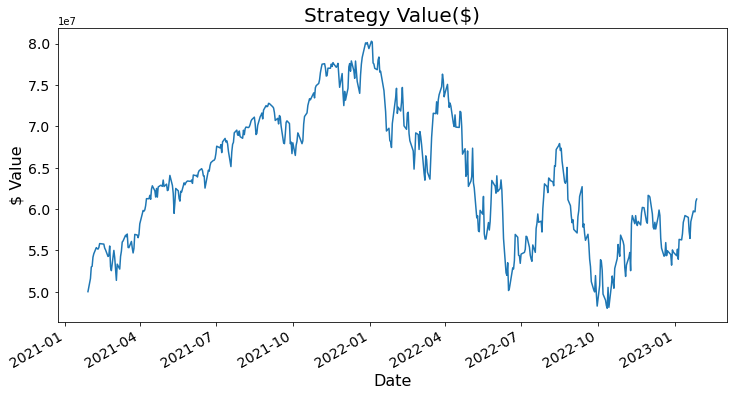

In [770]:
_plot_(series = initial_sim_res.net_values(), ylabel = '$ Value', title = 'Strategy Value($)')

<AxesSubplot:title={'center':'Strategy Value($)'}, xlabel='Date', ylabel='$ Value'>

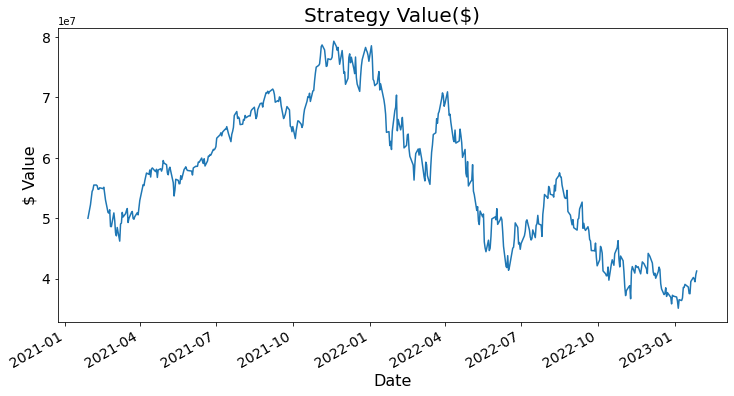

In [771]:
_plot_(series = opt_sim_res.net_values(), ylabel = '$ Value', title = 'Strategy Value($)')

### [To Table of Contents](#TOC)